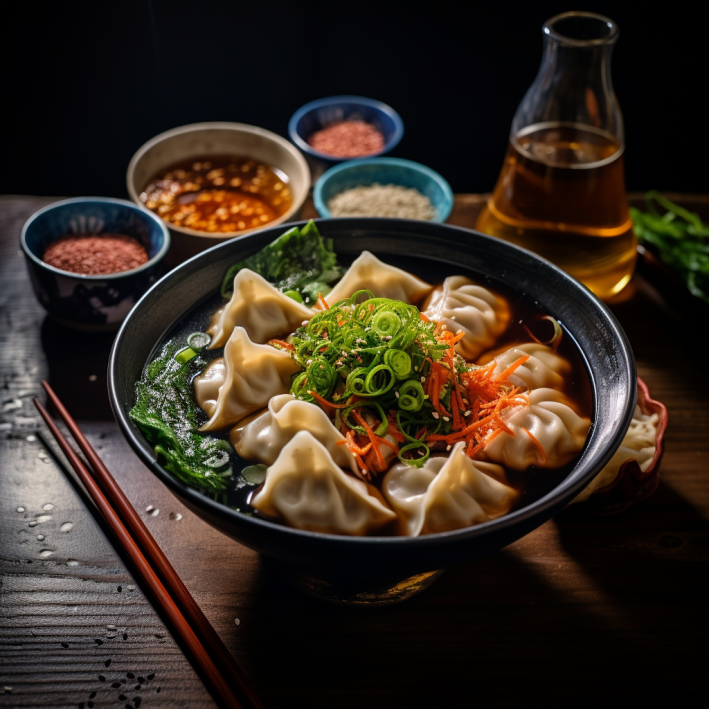

Your written report should include both code, output and written text summaries of the following:

Data Validation:
Describe validation and cleaning steps for every column in the data
Exploratory Analysis:
Include two different graphics showing single variables only to demonstrate the characteristics of data
Include at least one graphic showing two or more variables to represent the relationship between features
Describe your findings
Model Development
Include your reasons for selecting the models you use as well as a statement of the problem type
Code to fit the baseline and comparison models
Model Evaluation
Describe the performance of the two models based on an appropriate metric
Business Metrics
Define a way to compare your model performance to the business
Describe how your models perform using this approach
Final summary including recommendations that the business should undertak

From: Stef To: Head of Data Science Subject: Report on the assigned project

1) Data Validation 

First, the data contains 52 NaN values in calories, carbohydrate, sugar, protein. I tried to use Median and Mode, however it didn't work out well, so I abandoned the idea as the results of the model turned out to be worse, so the decision was to drop 52 missing rows. 

High traffic also has missing values but in this case, it is not missing at random, so I just replaced NA values with Not High. 

Backlog of changes: calories - NA rows, extreme outliers (Q3 + 3 IQR) were capped, scaled using MinMax carbohydrate - NA rows dropped, extreme outliers (Q3 + 3 IQR) were capped, scaled using MinMax sugar 

- NA rows dropped, extreme outliers (Q3 + 3 IQR) were capped, scaled using MinMax protein - NA rows dropped, extreme outliers (Q3 + 3 IQR) were capped, scaled using MinMax category 

- 'Chicken Breast' values for changed to 'Chicken', then columns were one hot encoded servings 
  - 2 values contained 'as a snack', they belonged to Lunch/Snack category so 'as a snack' was removed, the column was transformed to float 64 
- 
high_traffic 
- - NaN values were replaced with 'not high' and then changed to 1 - high, 0 - not high

# Data Science Professional 

# Data Validation 
This data set has 947 rows, 8 columns. 
I have validated all variables and I have made several changes after validation: 

 replace null values in high_traffic with "Low".
 mean fill of 52 rows for 

 - recipe: 947 unique identifiers without missing values. No cleaning is needed
 - calories: 895 non-null values. I fill 52 missed values with the mean grouped by category and servings.
 - carbohydrate: 895 non-null values. I fill 52 missed values with the mean grouped by category and servings.
 - sugar: 895 non-null values. I fill 52 missed values with the mean grouped by category and servings.
 - protein: 895 non-null values. I fill 52 missed values with the mean grouped by category and servings.
 - category: 11 unique values without missing values, whereas there were 10 values in the description. 'Chicken Breast' is united with the 'Chicken'.
 - servings: 6 unique values without missing values. By description, it should be numeric variable, but now it's character. Has two extra values: '4 as a snack' and '6 as a snack'. I united them with '4' and '6' and changed the column's type to integer.
high_traffic: only 1 non-null value ("High"). Replaced null values with "Low".

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from scipy.stats import ttest_ind

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
df = pd.read_csv("recipe_site_traffic_2212.csv")
df

recipe  calories  carbohydrate  sugar  protein      category servings  \
0         1       NaN           NaN    NaN      NaN          Pork        6   
1         2     35.48         38.56   0.66     0.92        Potato        4   
2         3    914.28         42.68   3.09     2.88     Breakfast        1   
3         4     97.03         30.56  38.63     0.02     Beverages        4   
4         5     27.05          1.85   0.80     0.53     Beverages        4   
..      ...       ...           ...    ...      ...           ...      ...   
942     943   1161.00          5.31  22.39    44.22  Lunch/Snacks        2   
943     944       NaN           NaN    NaN      NaN        Potato        2   
944     945    951.74         29.42   3.57    13.87          Pork        2   
945     946    266.61         35.77   0.97     8.07        Potato        6   
946     947    184.56         45.21   6.20     0.03     Beverages        4   

    high_traffic  
0           High  
1           High  
2            NaN  
3           High  
4            NaN  
..           ...  
942          NaN  
943         High  
944         High  
945         High  
946          NaN  

[947 rows x 8 columns]

In [3]:
# Set index as recipe
df = df.set_index('recipe')

In [4]:
# get statistical summary
df.describe()

calories  carbohydrate       sugar     protein
count   895.000000    895.000000  895.000000  895.000000
mean    435.939196     35.069676    9.046547   24.149296
std     453.020997     43.949032   14.679176   36.369739
min       0.140000      0.030000    0.010000    0.000000
25%     110.430000      8.375000    1.690000    3.195000
50%     288.550000     21.480000    4.550000   10.800000
75%     597.650000     44.965000    9.800000   30.200000
max    3633.160000    530.420000  148.750000  363.360000

In [5]:
# Check for missing values and data types
missing_values = df.isnull().sum()
data_types = df.dtypes

missing_values, data_types

(calories         52
 carbohydrate     52
 sugar            52
 protein          52
 category          0
 servings          0
 high_traffic    373
 dtype: int64,
 calories        float64
 carbohydrate    float64
 sugar           float64
 protein         float64
 category         object
 servings         object
 high_traffic     object
 dtype: object)

| Missing Values | Columns                                                |
|-------------|---------------------------------------------------------|
| 52   | </br> calories, carbohydrate, sugar, and protein columns. |
| 373        |  </br>high_traffic  |


Data Types:
 - calories, carbohydrate, sugar, and protein are of type float, which is also appropriate for these columns.
 - category and high_traffic are of type object (likely strings), which is expected.
 - servings is of type object, which might be a *concern* if we expect it to be numerical.

In [6]:
#replace NaN in high Traffic with Low
df['high_traffic'].fillna('Low', inplace=True)

In [7]:
# Check the number of rows in the dataset
total_rows = len(df)

# Calculate the proportion of missing values for affected columns
missing_proportions = missing_values / total_rows

total_rows, missing_proportions[['calories', 'carbohydrate', 'sugar', 'protein', 'high_traffic']]


(947,
 calories        0.054910
 carbohydrate    0.054910
 sugar           0.054910
 protein         0.054910
 high_traffic    0.393875
 dtype: float64)

For the columns calories, carbohydrate, sugar, and protein, we can either:
Fill the missing values with the mean or median of the respective column.
Remove the rows with missing values.

Before making decisions, it might be helpful to know the size of the dataset and the proportion of missing values. Let's check the number of rows in the dataset and the proportion of missing values in the affected columns.



For high_traffic, we can replace the NaN values with 'Low' to indicate non-high traffic.

In the current context, given that only about 5.49% of data is missing in some columns, it makes sense to impute them (using the median, mean), but both show the model performance is not performing well. So we disregard the option and drop them eventually 

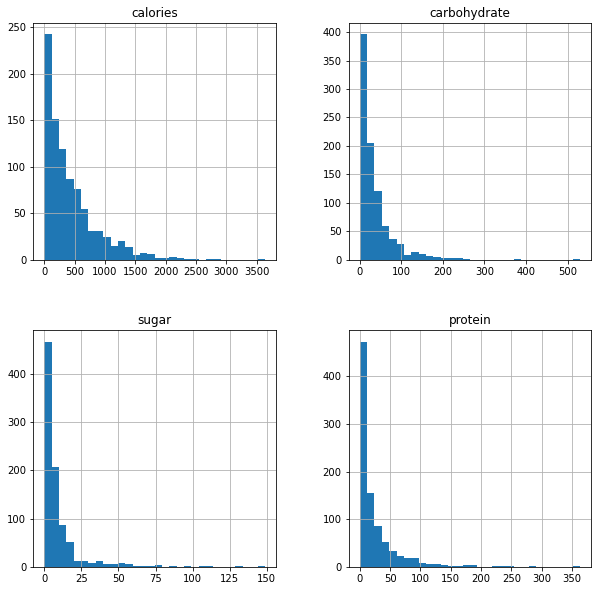

In [8]:
#plot all columns to see the distribution
df.hist(figsize=(10,10), bins=30)
plt.show()

Description of Findings (Histogram for Calories):

The majority of recipes have caloric content ranging between approximately 0 to 200 calories.
The distribution is right-skewed, meaning there are a few recipes with a much higher caloric content that extends towards the right tail.
There's a noticeable peak around the 100-150 calorie range, suggesting that many recipes fall within this caloric content.

Let's eximine the data and unique values 

In [9]:
# Check unique values in 'category', 'servings', and 'high_traffic' columns
category_unique_values = df['category'].unique()
servings_unique_values = df['servings'].unique()
high_traffic_unique_values = df['high_traffic'].unique()

category_unique_values, servings_unique_values, high_traffic_unique_values


(array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
        'Chicken Breast', 'Lunch/Snacks', 'Chicken', 'Vegetable', 'Meat',
        'Dessert'], dtype=object),
 array(['6', '4', '1', '2', '4 as a snack', '6 as a snack'], dtype=object),
 array(['High', 'Low'], dtype=object))

category:
 - The values seem consistent, and there aren't any evident spelling mistakes but Chicken Breast and Chicken could be put together.

servings:
- We see values like '4 as a snack' and '6 as a snack'. These entries have additional text, which is likely why the column is of type 'object'. We might want to clean these values to extract the numerical part and convert the entire column to a numerical type.
  
high_traffic:
- The values are either 'High' or NaN (missing). If this column is supposed to indicate high traffic, we might want to replace NaN with something like 'Low' or another appropriate value.


In [10]:
# Chicken and Chicken Breast can be put together, replace Chicken Breast with Chicken
df['category'].replace('Chicken Breast', 'Chicken', inplace=True)

In [11]:
def determine_healthiness(row):
    if row['category'] == 'Vegetable':
        return 1
    elif (row['calories'] <= 400 and 
          row['carbohydrate'] >= 15 and 
          row['carbohydrate'] <= 80 and 
          row['sugar'] <= 10 and 
          row['protein'] >= 10):
        return 1
    else:
        return 0

# Apply the function to each row of the dataframe
df['healthy'] = df.apply(determine_healthiness, axis=1)





In [12]:
# Extract numerical values from the 'servings' column and convert to integer
df['servings'] = df['servings'].str.extract('(\d+)').astype(int)

# Check the unique values in 'servings' after cleaning
servings_unique_values_cleaned = df['servings'].unique()
servings_unique_values_cleaned


array([6, 4, 1, 2])

In [13]:
df['category'].unique()


array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken', 'Lunch/Snacks', 'Vegetable', 'Meat', 'Dessert'],
      dtype=object)

In [14]:
#Difficulty 

category_points = {'Beverages': 1, 'Breakfast': 1, 'Chicken': 3, 'Dessert': 4,
                   'Lunch/Snacks': 2, 'Meat': 4, 'One Dish Meal': 3, 'Pork': 4, 'Potato': 1, 'Vegetable': 1}

# Create a dictionary to map servings to difficulty points

# Create a new column "difficulty" by mapping the category and servings to their corresponding points
df['difficulty'] = df['category'].map(category_points) + df['servings']
df[['difficulty','high_traffic']].groupby('difficulty').value_counts()

difficulty  high_traffic
2           Low              39
            High             29
3           High             54
            Low              32
4           High             34
            Low              30
5           High            147
            Low             103
6           High             56
            Low              26
7           High             88
            Low              84
8           High             96
            Low              28
9           High             28
            Low              17
10          High             42
            Low              14
dtype: int64

In [15]:
high_traffic_df = df[df['high_traffic'] == 'High']
low_traffic_df = df[df['high_traffic'] == 'Low']


t, p = ttest_ind(high_traffic_df['difficulty'], low_traffic_df['difficulty'])
print("t-statistic for difficulty: ", t)
print("p-value for difficulty: ", p,'\n')

t-statistic for difficulty:  3.6714170673806175
p-value for difficulty:  0.00025472839569389607 



In [16]:
def rank_difficulty(value):
    if 2 <= value <= 4:
        return 1  # Easy
    elif 5 <= value <= 7:
        return 2  # Medium
    elif 8 <= value <= 10:
        return 3  # Hard
    else:
        return None  # For values outside the range or missing data

df['difficulty'] = df['difficulty'].apply(rank_difficulty)


In [17]:
df[['difficulty','high_traffic']].groupby('difficulty').value_counts()


difficulty  high_traffic
1           High            117
            Low             101
2           High            291
            Low             213
3           High            166
            Low              59
dtype: int64

In [18]:
high_traffic_df = df[df['high_traffic'] == 'High']
low_traffic_df = df[df['high_traffic'] == 'Low']


t, p = ttest_ind(high_traffic_df['difficulty'], low_traffic_df['difficulty'])
print("t-statistic for difficulty: ", t)
print("p-value for difficulty: ", p,'\n')

t-statistic for difficulty:  4.391914983879212
p-value for difficulty:  1.2504896418730975e-05 



It's very obvious that the p-value is less than 0.05, which is commonly used as a threshold for determining statistical significance. This indicates that there is a statistically significant difference in means of these features between high traffic and low traffic recipes. so difficulty of the recipe may affect the traffic in some way

Now I will divide the difficulty into 3 groups:

from 2 to 4 is easy
from 4 to 7 is medium
from 7 to 10 is hard

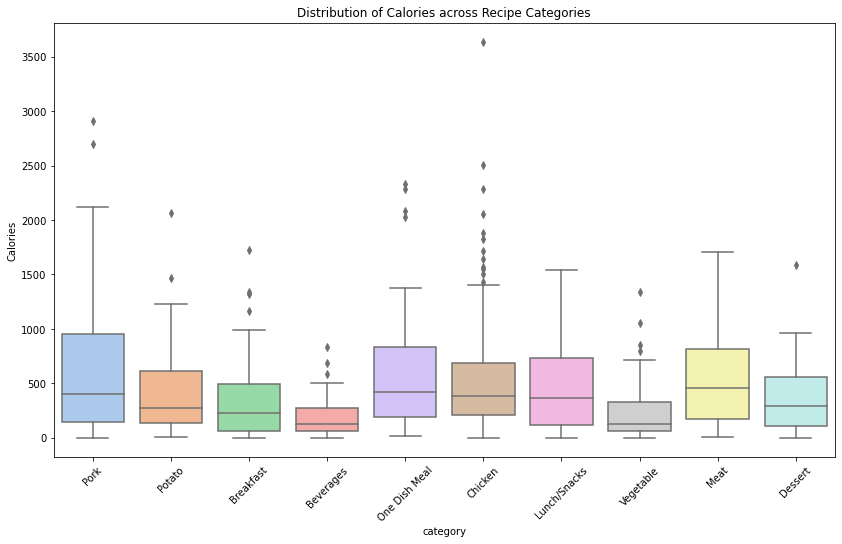

In [19]:
# Box plot for 'calories' across different 'categories'
plt.figure(figsize=(14, 8))
sns.boxplot(x=df['category'], y=df['calories'], palette="pastel")
plt.title('Distribution of Calories across Recipe Categories')
plt.xlabel('category')
plt.ylabel('Calories')
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:title={'center':'Count plot category by traffic'}, xlabel='category', ylabel='count'>

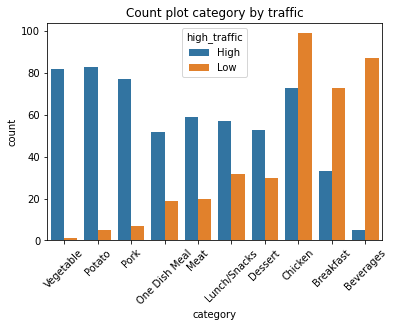

In [20]:
# get countplot to check relationship between high traffic and category
plt.title('Count plot category by traffic')
plt.figsize=(15,15)
plt.xticks(rotation=45)
sns.countplot(x=df['category'].sort_values(ascending=False), hue =df['high_traffic'])

Box Plot for Calories across Categories:

The "Meat" category tends to have the highest median caloric content, with a broad interquartile range, indicating a wide variety of meat dishes in terms of their caloric content.
"Beverages" have the lowest median caloric content, which is expected since drinks typically have fewer calories than solid foods.
There's noticeable variation in caloric content within categories like "One Dish Meal", "Chicken", and "Dessert", as indicated by the widths of their boxes and the lengths of their whiskers.

#The servings column has been cleaned, and it now contains only the numerical values: 

<AxesSubplot:xlabel='servings', ylabel='count'>

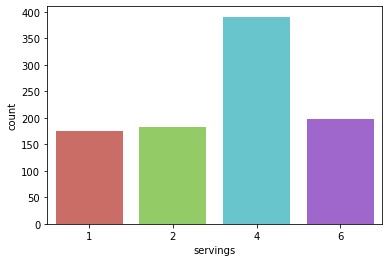

In [21]:
# servings plot
sns.countplot(x='servings', data=df, palette='hls')

<AxesSubplot:xlabel='servings'>

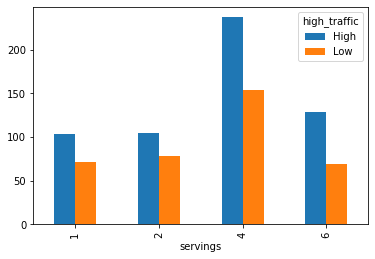

In [22]:
#bar chart of servings with high traffic
pd.crosstab(df.servings, df.high_traffic).plot(kind='bar')

In [23]:
# Impute the missing values in 'calories', 'carbohydrate', 'sugar', and 'protein' with their respective medians, median is used as the data is skewed
df['calories'].fillna(df['calories'].median(), inplace=True)
df['carbohydrate'].fillna(df['carbohydrate'].median(), inplace=True)
df['sugar'].fillna(df['sugar'].median(), inplace=True)
df['protein'].fillna(df['protein'].median(), inplace=True)

# Impute the missing values in 'high_traffic' with 'Low'
df['high_traffic'].fillna('Low', inplace=True)

# Check if all missing values are im


In [24]:
df['high_traffic'].fillna('Low', inplace=True)

# drop all other missing values
df.dropna(inplace=True)

In [25]:
# count healthy 
df[df['healthy']==1].value_counts(['high_traffic'])

high_traffic
High            141
Low              46
dtype: int64

In [26]:
# percentage healthy of total rows
df[df['healthy']==1].value_counts(['high_traffic'])/len(df)

high_traffic
High            0.148891
Low             0.048574
dtype: float64

In [27]:
#check for missing values
df.isnull().sum()

calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
healthy         0
difficulty      0
dtype: int64

In [28]:
df.columns

Index(['calories', 'carbohydrate', 'sugar', 'protein', 'category', 'servings',
       'high_traffic', 'healthy', 'difficulty'],
      dtype='object')

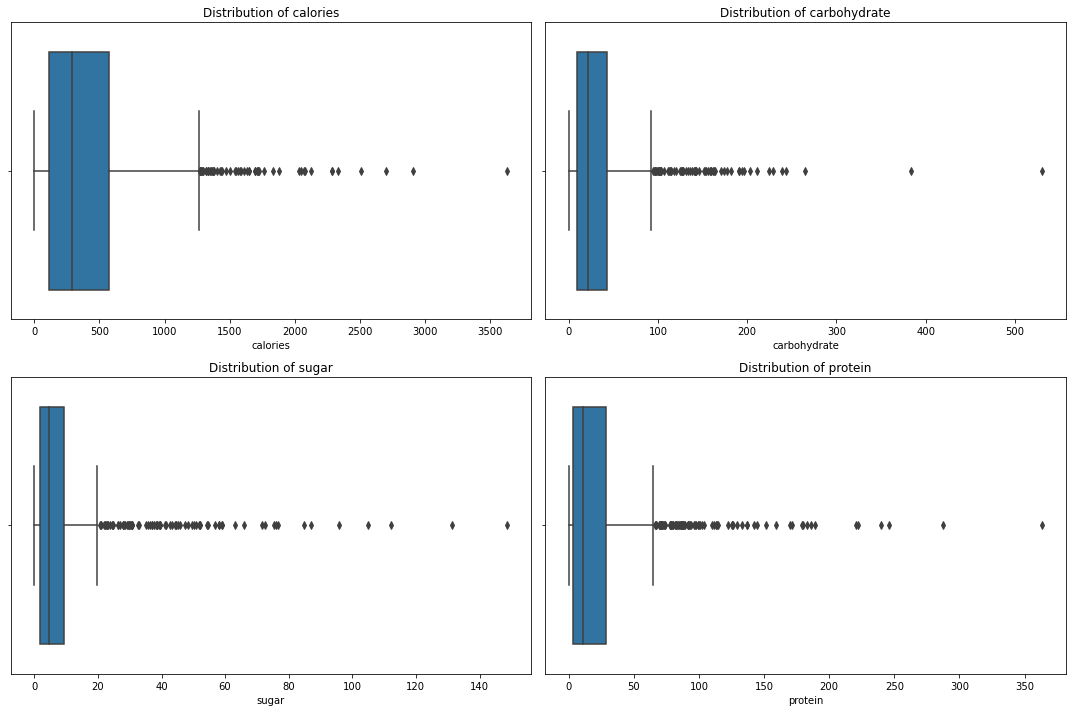

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Columns to visualize for potential outliers
columns_to_check = ['calories', 'carbohydrate', 'sugar', 'protein']

plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

The boxplots clearly indicate the presence of outliers in the columns calories, carbohydrate, sugar, and protein. These outliers could potentially be the cause of the error when trying to standardize the data.

To handle these outliers, we can employ one of the following strategies:

Capping: Replace outlier values with the boundary values (either the 1st or 3rd quartile values depending on whether it's a lower or upper outlier).
Transformation: Apply transformations like log transformation to reduce the effect of outliers.
Removal: Remove records with outlier values.
Given the importance of not losing data, especially in this context where we are trying to predict high traffic recipes, I recommend using the capping method. This method will ensure we retain all records while minimizing the influence of extreme values.



In [30]:
df.shape

(947, 9)

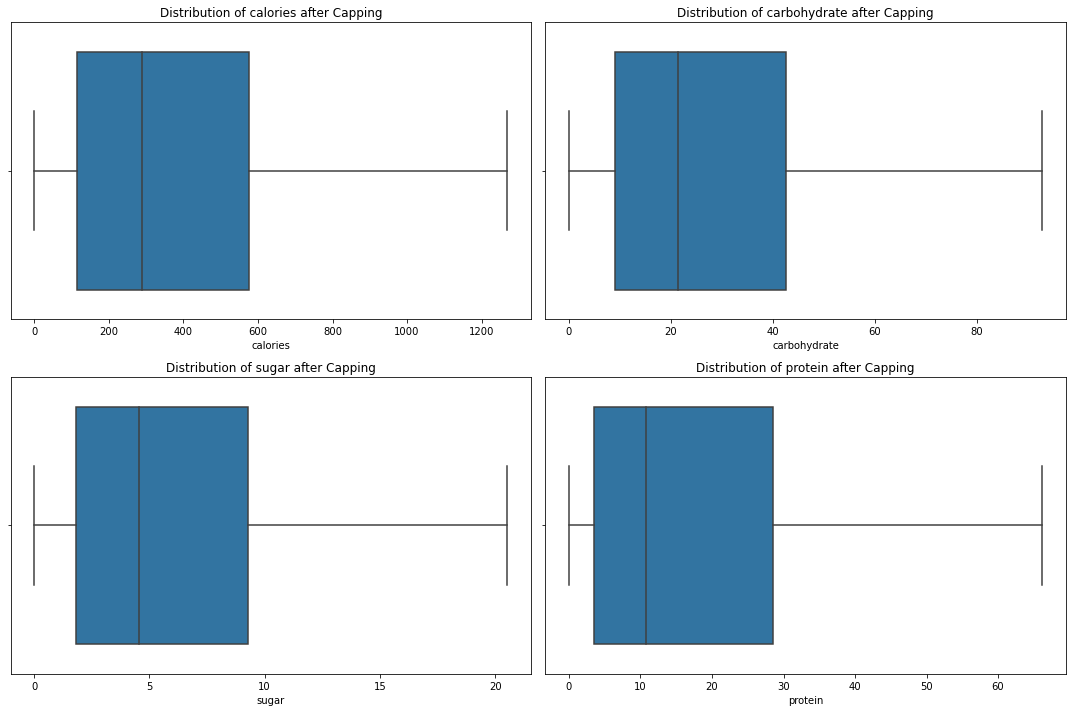

In [31]:
# Capping outliers based on the IQR method
for col in columns_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replace outliers with boundary values
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Visualize the distributions after capping
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Distribution of {col} after Capping')

plt.tight_layout()
plt.show()


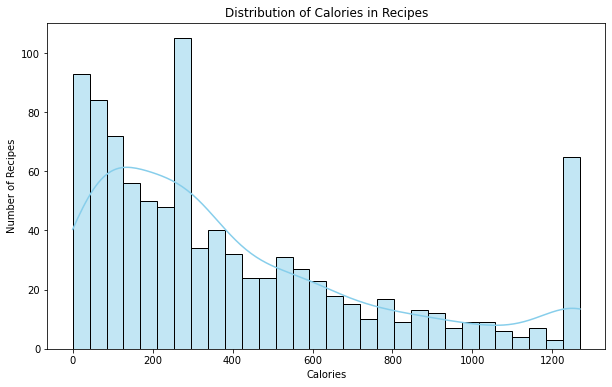

In [32]:
#show histogram of calories
plt.figure(figsize=(10, 6))
sns.histplot(df['calories'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Calories in Recipes')
plt.xlabel('Calories')
plt.ylabel('Number of Recipes')
plt.show()

In [33]:
import numpy as np
import sklearn

print("Numpy version:", np.__version__)
print("Sklearn version:", sklearn.__version__)


Numpy version: 1.21.6
Sklearn version: 0.24.2


In [34]:
#Import the PowerTransformer
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
df[['pt_calories', 'pt_carbohydrate', 'pt_sugar', 'pt_protein']] = pt.fit_transform(df[['calories', 'carbohydrate', 'sugar', 'protein']])


# log transformation of 'calories', 'sugar','carbohydrate','protein'
df['log_calories'] = np.log(df['calories'])# remove
df['log_sugar'] = np.log(df['sugar']) # remove
df['log_carbohydrates'] = np.log(df['carbohydrate'])
df['log_protein'] = np.log1p(df['protein'])


In [35]:
# test for normality
from scipy.stats import shapiro

# Testing for normality 'log_calories', 'log_sugar'
columns_to_test = ['pt_calories', 'pt_carbohydrate', 'pt_sugar', 'pt_protein']

for column in columns_to_test:
    stat, p = shapiro(df[column])
    print(f"Shapiro-Wilk Test for {column}:")
    print(f"Statistic = {stat:.5f}, p-value = {p:.5f}")
    if p > 0.05:
        print(f"{column} looks Gaussian (fail to reject H0)\n")
    else:
        print(f"{column} does not look Gaussian (reject H0)\n")

Shapiro-Wilk Test for pt_calories:
Statistic = 0.98211, p-value = 0.00000
pt_calories does not look Gaussian (reject H0)

Shapiro-Wilk Test for pt_carbohydrate:
Statistic = 0.97679, p-value = 0.00000
pt_carbohydrate does not look Gaussian (reject H0)

Shapiro-Wilk Test for pt_sugar:
Statistic = 0.96631, p-value = 0.00000
pt_sugar does not look Gaussian (reject H0)

Shapiro-Wilk Test for pt_protein:
Statistic = 0.95953, p-value = 0.00000
pt_protein does not look Gaussian (reject H0)



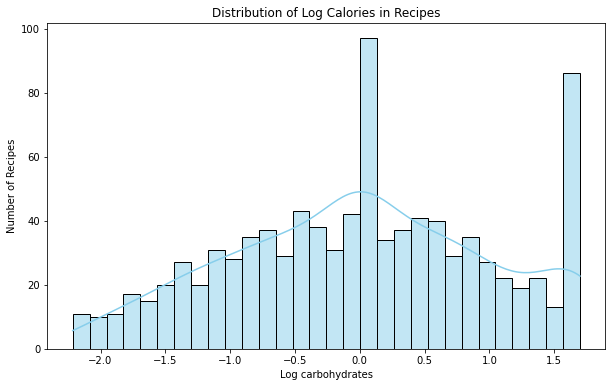

In [36]:
# Histogram for 'log_calories'
plt.figure(figsize=(10, 6))
sns.histplot(df['pt_carbohydrate'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Log Calories in Recipes')
plt.xlabel('Log carbohydrates')
plt.ylabel('Number of Recipes')
plt.show()

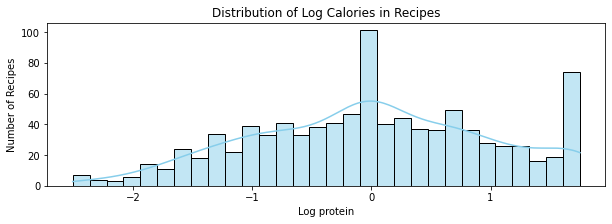

In [37]:
# Histogram for 'log_calories'
plt.figure(figsize=(10, 3))
sns.histplot(df['pt_calories'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Log Calories in Recipes')
plt.xlabel('Log protein')
plt.ylabel('Number of Recipes')
plt.show()

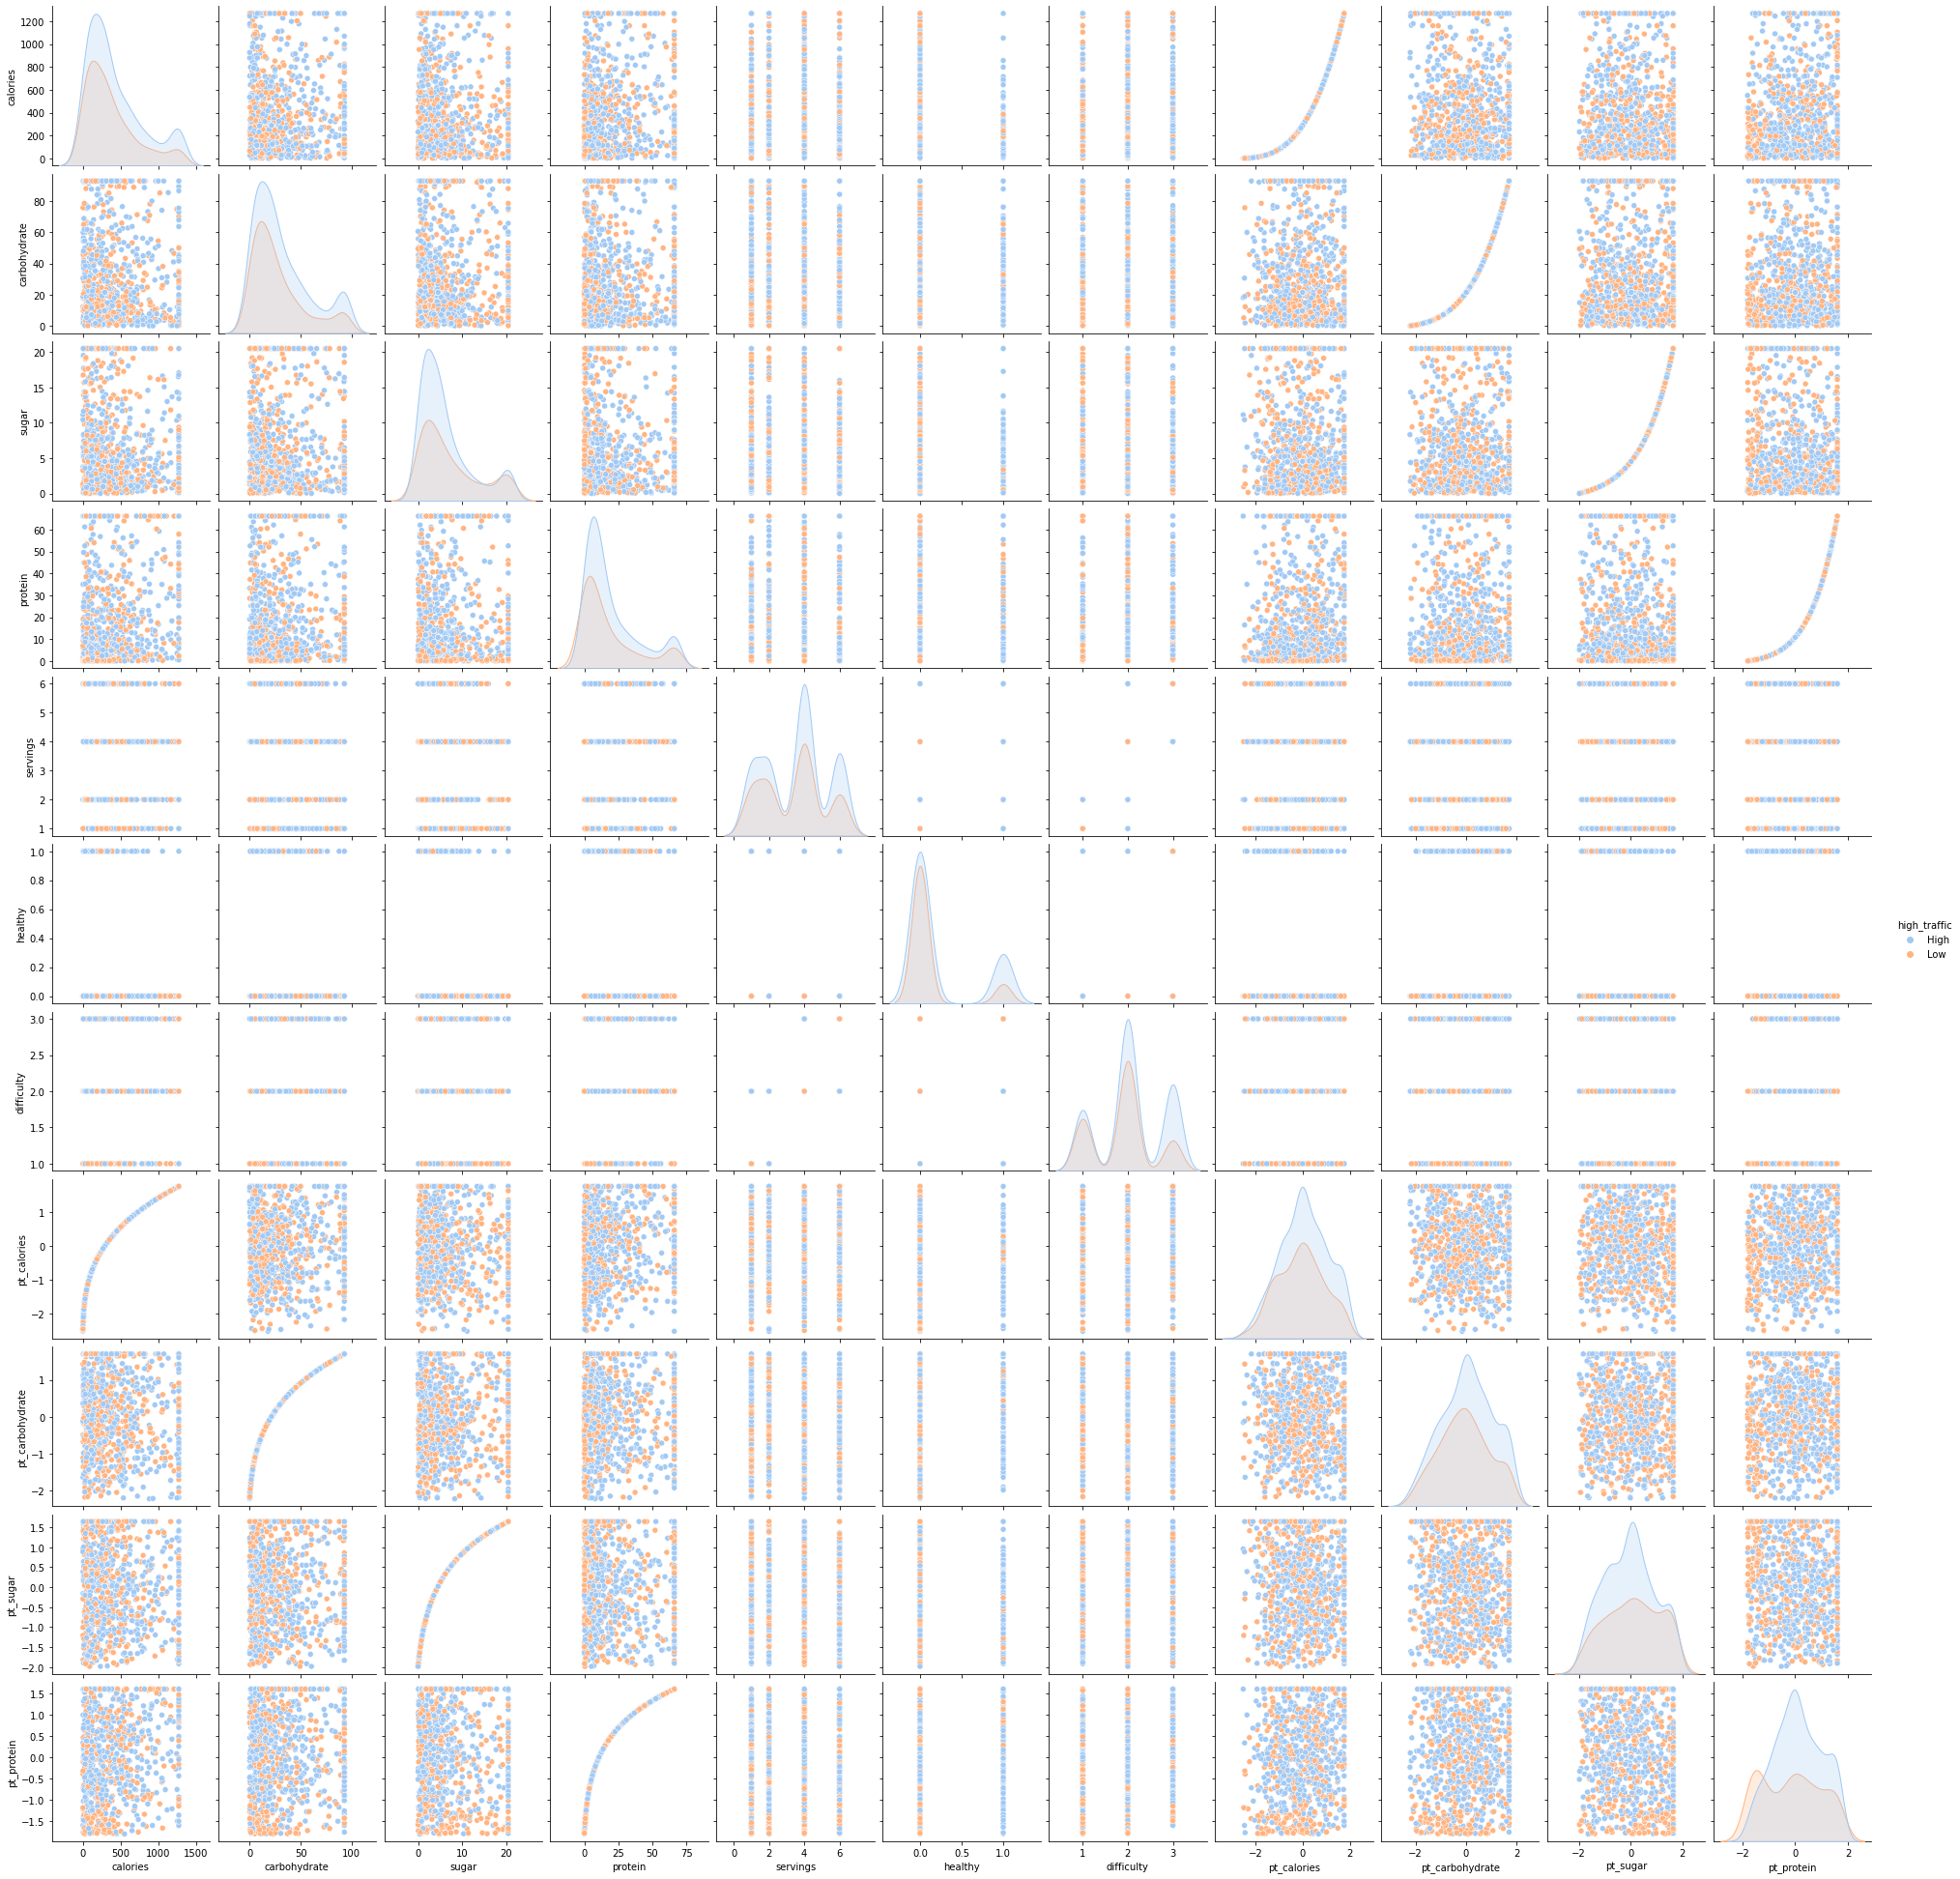

In [38]:
#searborn pairplot
sns.pairplot(df, hue = 'high_traffic', palette="pastel")
plt.show()

In [39]:
df.columns

Index(['calories', 'carbohydrate', 'sugar', 'protein', 'category', 'servings',
       'high_traffic', 'healthy', 'difficulty', 'pt_calories',
       'pt_carbohydrate', 'pt_sugar', 'pt_protein'],
      dtype='object')

In [40]:
# use statistcal test t-test to compare means of high traffic and low traffic in calories, carbohydrates, sugar, and protein
from scipy.stats import ttest_ind

# t-test for 'calories'
high_traffic_calories = df[df['high_traffic'] == 'High']['pt_calories']
low_traffic_calories = df[df['high_traffic'] == 'Low']['pt_calories']

ttest_ind(high_traffic_calories, low_traffic_calories)

# t-test for 'carbohydrate'
high_traffic_carbohydrate = df[df['high_traffic'] == 'High']['pt_carbohydrate']
low_traffic_carbohydrate = df[df['high_traffic'] == 'Low']['pt_carbohydrate']

ttest_ind(high_traffic_carbohydrate, low_traffic_carbohydrate)

# t-test for 'sugar'
high_traffic_sugar = df[df['high_traffic'] == 'High']['pt_sugar']
low_traffic_sugar = df[df['high_traffic'] == 'Low']['pt_sugar']

ttest_ind(high_traffic_sugar, low_traffic_sugar)

# t-test for 'protein'
high_traffic_protein = df[df['high_traffic'] == 'High']['pt_protein']
low_traffic_protein = df[df['high_traffic'] == 'Low']['pt_protein']

ttest_ind(high_traffic_protein, low_traffic_protein)

# print t-statistic and p-value for each variable
print('Calories: ', ttest_ind(high_traffic_calories, low_traffic_calories))
print('Carbohydrate: ', ttest_ind(high_traffic_carbohydrate, low_traffic_carbohydrate))
print('Sugar: ', ttest_ind(high_traffic_sugar, low_traffic_sugar))
print('Protein: ', ttest_ind(high_traffic_protein, low_traffic_protein))

Calories:  Ttest_indResult(statistic=2.0541995329156375, pvalue=0.04023099314711376)
Carbohydrate:  Ttest_indResult(statistic=1.8262981052884302, pvalue=0.0681207552159238)
Sugar:  Ttest_indResult(statistic=-2.100555484409667, pvalue=0.03594447777576452)
Protein:  Ttest_indResult(statistic=3.778427760646781, pvalue=0.00016770038234075908)


In [41]:
from scipy.stats import chi2_contingency,ttest_ind

contingency_table = pd.crosstab(df['category'], df['high_traffic'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
chi2, p

(318.2935223075692, 3.417304408371102e-63)

the chi-squared statistic is 300.1309861002327, and the p-value below 0.05  means that we can reject the null hypothesis and conclude that there is a significant association between the category of the recipe and the level of traffic to the website when the recipe was shown.

as you will see in the following plot that shows the number of recipes that belong to each category and whether they have high traffic or not. From this plot, we can conclude that there is a strong association between the category and high_traffic variables

In [42]:
contingency_table = pd.crosstab(df['servings'], df['high_traffic'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
chi2, p

(2.7369889309788054, 0.4339779666711946)

From the following plot and the p-value there is not significant association between the servings and the high traffic data

Model Fitting & Evaluation
It's clear that this is a classification problem. The target variable, high_traffic, is binary, indicating whether a recipe will lead to high traffic or not.

For the evaluation, I chose  Accuracy: This measures the proportion of correct predictions in the total predictions made. Given the goal of predicting high traffic recipes correctly 80% of the time, accuracy will be a primary metric of interest.

Approximately 59.78% of the recipes do not lead to high traffic (Class 0).

Approximately 40.22% of the recipes lead to high traffic (Class 1).

While there is a slight imbalance, it's not extremely skewed. However, even this degree of imbalance can sometimes lead to biased model predictions, especially if the model ends up favoring the majority class.

In [43]:
df

calories  carbohydrate  sugar  protein      category  servings  \
recipe                                                                   
1         288.55         21.48   4.55    10.80          Pork         6   
2          35.48         38.56   0.66     0.92        Potato         4   
3         914.28         42.68   3.09     2.88     Breakfast         1   
4          97.03         30.56  20.52     0.02     Beverages         4   
5          27.05          1.85   0.80     0.53     Beverages         4   
...          ...           ...    ...      ...           ...       ...   
943      1161.00          5.31  20.52    44.22  Lunch/Snacks         2   
944       288.55         21.48   4.55    10.80        Potato         2   
945       951.74         29.42   3.57    13.87          Pork         2   
946       266.61         35.77   0.97     8.07        Potato         6   
947       184.56         45.21   6.20     0.03     Beverages         4   

       high_traffic  healthy  difficulty  pt_calories  pt_carbohydrate  \
recipe                                                                   
1              High        0           3    -0.003243         0.009159   
2              High        0           2    -1.443906         0.613120   
3               Low        0           1     1.291509         0.727170   
4              High        0           2    -0.868755         0.362397   
5               Low        0           2    -1.569741        -1.643838   
...             ...      ...         ...          ...              ...   
943             Low        0           1     1.621900        -1.097059   
944            High        0           1    -0.003243         0.009159   
945            High        0           2     1.345365         0.322769   
946            High        0           2    -0.076326         0.530551   
947             Low        0           2    -0.393759         0.793137   

        pt_sugar  pt_protein  
recipe                        
1       0.021311   -0.001768  
2      -1.402296   -1.379026  
3      -0.340626   -0.877516  
4       1.643819   -1.798229  
5      -1.307421   -1.532845  
...          ...         ...  
943     1.643819    1.207910  
944     0.021311   -0.001768  
945    -0.209201    0.194031  
946    -1.201570   -0.218636  
947     0.330948   -1.791980  

[947 rows x 13 columns]

In [44]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures


In [45]:
df

calories  carbohydrate  sugar  protein      category  servings  \
recipe                                                                   
1         288.55         21.48   4.55    10.80          Pork         6   
2          35.48         38.56   0.66     0.92        Potato         4   
3         914.28         42.68   3.09     2.88     Breakfast         1   
4          97.03         30.56  20.52     0.02     Beverages         4   
5          27.05          1.85   0.80     0.53     Beverages         4   
...          ...           ...    ...      ...           ...       ...   
943      1161.00          5.31  20.52    44.22  Lunch/Snacks         2   
944       288.55         21.48   4.55    10.80        Potato         2   
945       951.74         29.42   3.57    13.87          Pork         2   
946       266.61         35.77   0.97     8.07        Potato         6   
947       184.56         45.21   6.20     0.03     Beverages         4   

       high_traffic  healthy  difficulty  pt_calories  pt_carbohydrate  \
recipe                                                                   
1              High        0           3    -0.003243         0.009159   
2              High        0           2    -1.443906         0.613120   
3               Low        0           1     1.291509         0.727170   
4              High        0           2    -0.868755         0.362397   
5               Low        0           2    -1.569741        -1.643838   
...             ...      ...         ...          ...              ...   
943             Low        0           1     1.621900        -1.097059   
944            High        0           1    -0.003243         0.009159   
945            High        0           2     1.345365         0.322769   
946            High        0           2    -0.076326         0.530551   
947             Low        0           2    -0.393759         0.793137   

        pt_sugar  pt_protein  
recipe                        
1       0.021311   -0.001768  
2      -1.402296   -1.379026  
3      -0.340626   -0.877516  
4       1.643819   -1.798229  
5      -1.307421   -1.532845  
...          ...         ...  
943     1.643819    1.207910  
944     0.021311   -0.001768  
945    -0.209201    0.194031  
946    -1.201570   -0.218636  
947     0.330948   -1.791980  

[947 rows x 13 columns]

In [46]:
# convert with one hot encoding category,servings, high_traffic, use 0 and 1
df = pd.get_dummies(df, columns=['category', 'high_traffic'], drop_first=False)
df.head()

calories  carbohydrate  sugar  protein  servings  healthy  difficulty  \
recipe                                                                          
1         288.55         21.48   4.55    10.80         6        0           3   
2          35.48         38.56   0.66     0.92         4        0           2   
3         914.28         42.68   3.09     2.88         1        0           1   
4          97.03         30.56  20.52     0.02         4        0           2   
5          27.05          1.85   0.80     0.53         4        0           2   

        pt_calories  pt_carbohydrate  pt_sugar  ...  category_Chicken  \
recipe                                          ...                     
1         -0.003243         0.009159  0.021311  ...                 0   
2         -1.443906         0.613120 -1.402296  ...                 0   
3          1.291509         0.727170 -0.340626  ...                 0   
4         -0.868755         0.362397  1.643819  ...                 0   
5         -1.569741        -1.643838 -1.307421  ...                 0   

        category_Dessert  category_Lunch/Snacks  category_Meat  \
recipe                                                           
1                      0                      0              0   
2                      0                      0              0   
3                      0                      0              0   
4                      0                      0              0   
5                      0                      0              0   

        category_One Dish Meal  category_Pork  category_Potato  \
recipe                                                           
1                            0              1                0   
2                            0              0                1   
3                            0              0                0   
4                            0              0                0   
5                            0              0                0   

        category_Vegetable  high_traffic_High  high_traffic_Low  
recipe                                                           
1                        0                  1                 0  
2                        0                  1                 0  
3                        0                  0                 1  
4                        0                  1                 0  
5                        0                  0                 1  

[5 rows x 23 columns]

In [47]:
# replace False with 0 and True with 1 on all columns
df = df.replace(False, 0)
df = df.replace(True, 1)

In [48]:
#rename high_traffic_Low to high_traffic
df.rename(columns={'high_traffic_Low': 'high_traffic'}, inplace=True)

In [49]:
df.head()

calories  carbohydrate  sugar  protein  servings  healthy  difficulty  \
recipe                                                                          
1         288.55         21.48   4.55    10.80         6        0           3   
2          35.48         38.56   0.66     0.92         4        0           2   
3         914.28         42.68   3.09     2.88         1        0           1   
4          97.03         30.56  20.52     0.02         4        0           2   
5          27.05          1.85   0.80     0.53         4        0           2   

        pt_calories  pt_carbohydrate  pt_sugar  ...  category_Chicken  \
recipe                                          ...                     
1         -0.003243         0.009159  0.021311  ...                 0   
2         -1.443906         0.613120 -1.402296  ...                 0   
3          1.291509         0.727170 -0.340626  ...                 0   
4         -0.868755         0.362397  1.643819  ...                 0   
5         -1.569741        -1.643838 -1.307421  ...                 0   

        category_Dessert  category_Lunch/Snacks  category_Meat  \
recipe                                                           
1                      0                      0              0   
2                      0                      0              0   
3                      0                      0              0   
4                      0                      0              0   
5                      0                      0              0   

        category_One Dish Meal  category_Pork  category_Potato  \
recipe                                                           
1                            0              1                0   
2                            0              0                1   
3                            0              0                0   
4                            0              0                0   
5                            0              0                0   

        category_Vegetable  high_traffic_High  high_traffic  
recipe                                                       
1                        0                  1             0  
2                        0                  1             0  
3                        0                  0             1  
4                        0                  1             0  
5                        0                  0             1  

[5 rows x 23 columns]

In [50]:
#drop high_traffic_High
df.drop(columns=['high_traffic_High'], inplace=True)

In [51]:
#check for missing values
df.isnull().sum()

calories                  0
carbohydrate              0
sugar                     0
protein                   0
servings                  0
healthy                   0
difficulty                0
pt_calories               0
pt_carbohydrate           0
pt_sugar                  0
pt_protein                0
category_Beverages        0
category_Breakfast        0
category_Chicken          0
category_Dessert          0
category_Lunch/Snacks     0
category_Meat             0
category_One Dish Meal    0
category_Pork             0
category_Potato           0
category_Vegetable        0
high_traffic              0
dtype: int64

In [52]:
# drop calroies, sugar, carbohydrate, protein
#df.drop(['calories', 'sugar', 'carbohydrate', 'protein'], axis=1, inplace=True)

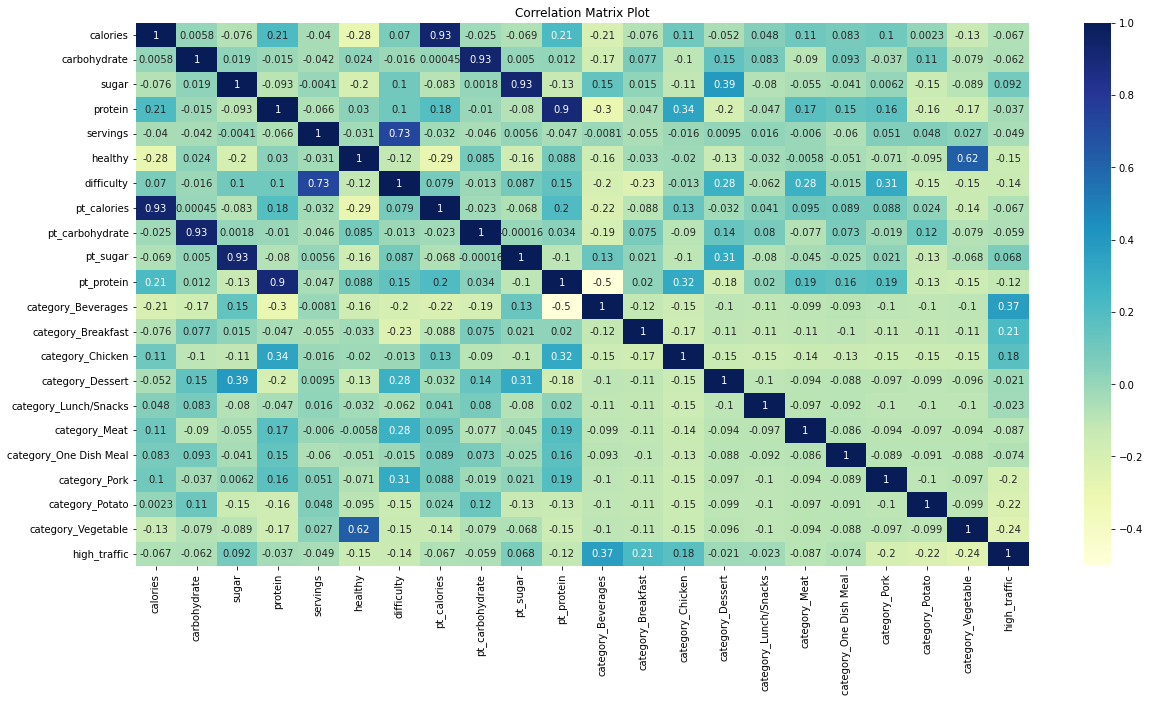

In [53]:
# show correlation matrix plot of all variables
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix Plot")
plt.show()


In [54]:
# aboslute high correlation  values with 'high_traffic' above abs values 0.001
high_corr = df.corr()['high_traffic'].abs().sort_values(ascending=False)
high_corr = high_corr[high_corr > 0.001]
high_corr




high_traffic              1.000000
category_Beverages        0.370437
category_Vegetable        0.242208
category_Potato           0.220794
category_Breakfast        0.214204
category_Pork             0.198287
category_Chicken          0.175195
healthy                   0.150135
difficulty                0.141433
pt_protein                0.121994
sugar                     0.092399
category_Meat             0.086880
category_One Dish Meal    0.073573
pt_sugar                  0.068172
calories                  0.066761
pt_calories               0.066674
carbohydrate              0.062259
pt_carbohydrate           0.059305
servings                  0.048708
protein                   0.036630
category_Lunch/Snacks     0.022626
category_Dessert          0.020571
Name: high_traffic, dtype: float64

In [55]:
# find the most important features relative to target with SelectKBest

X = df.drop('high_traffic', axis=1)
y = df['high_traffic']


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


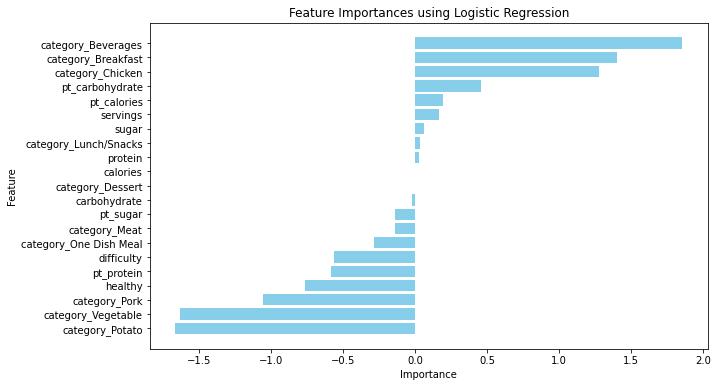

In [56]:
# Feature importance with logistic classifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Initialize the logistic regression
logreg = LogisticRegression()

# Fit the model
logreg.fit(X, y)

# Get the feature importances
feature_importances = logreg.coef_[0]

# Create a DataFrame for visualization
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10,6))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances using Logistic Regression')
plt.gca().invert_yaxis()  # Highest importances at the top
plt.show()


In [57]:
# rank all features in a table in absolute order of importance from the previous model
features_df['Importance'] = abs(features_df['Importance'])
features_df = features_df.sort_values(by='Importance', ascending=False)
features_df

Feature  Importance
11      category_Beverages    1.854013
19         category_Potato    1.663069
20      category_Vegetable    1.631699
12      category_Breakfast    1.404027
13        category_Chicken    1.276373
18           category_Pork    1.052441
5                  healthy    0.760460
10              pt_protein    0.584456
6               difficulty    0.558684
8          pt_carbohydrate    0.456227
17  category_One Dish Meal    0.282077
7              pt_calories    0.191356
4                 servings    0.169105
16           category_Meat    0.139551
9                 pt_sugar    0.138498
2                    sugar    0.060223
15   category_Lunch/Snacks    0.036233
3                  protein    0.025759
1             carbohydrate    0.017670
14        category_Dessert    0.001349
0                 calories    0.000521

In [58]:
# Drop  log_protein, log_carbohydrates, sugar, log_calories,  'carbohydrate', 'sugar'
df.drop([ 'protein','carbohydrate','sugar','calories'], axis=1, inplace=True)

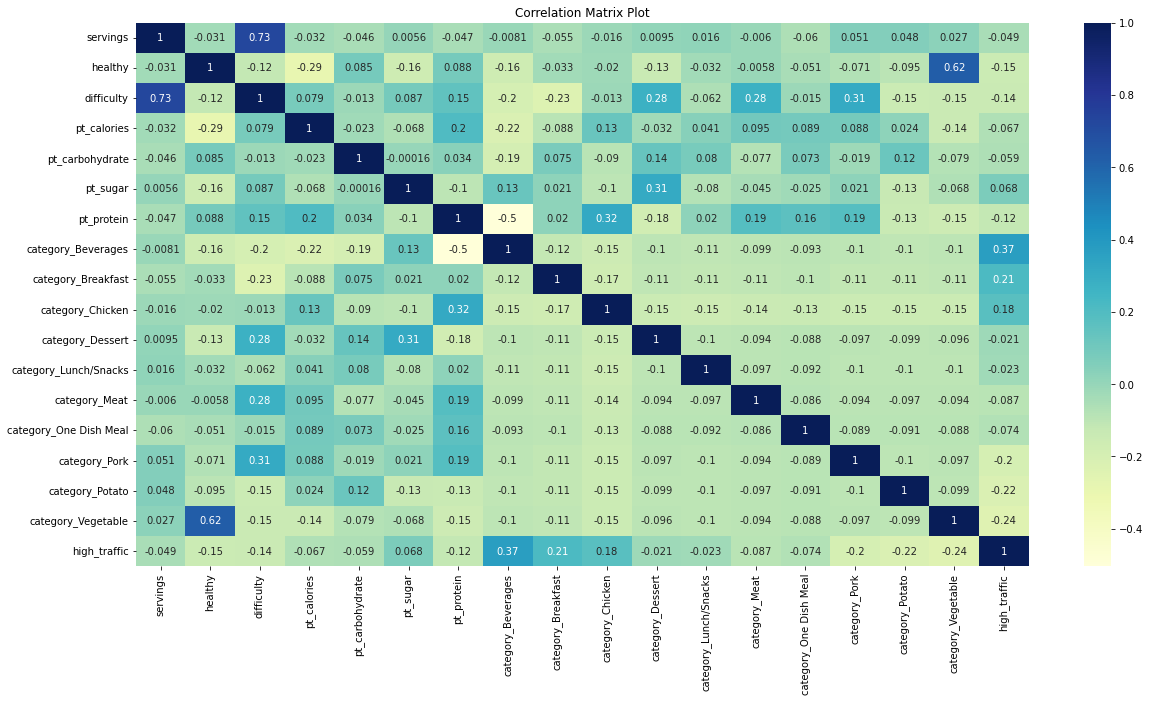

In [59]:
# show correlation matrix plot of all variables
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix Plot")
plt.show()

In [60]:
#Use sharply to see the best features


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 947 entries, 1 to 947
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   servings                947 non-null    int64  
 1   healthy                 947 non-null    int64  
 2   difficulty              947 non-null    int64  
 3   pt_calories             947 non-null    float64
 4   pt_carbohydrate         947 non-null    float64
 5   pt_sugar                947 non-null    float64
 6   pt_protein              947 non-null    float64
 7   category_Beverages      947 non-null    uint8  
 8   category_Breakfast      947 non-null    uint8  
 9   category_Chicken        947 non-null    uint8  
 10  category_Dessert        947 non-null    uint8  
 11  category_Lunch/Snacks   947 non-null    uint8  
 12  category_Meat           947 non-null    uint8  
 13  category_One Dish Meal  947 non-null    uint8  
 14  category_Pork           947 non-null    ui

In [62]:
#remove servings_2,servings_4,servings_6
#df.drop(['servings_6'], axis=1, inplace=True)

# Model Fitting and Evaluation 

Predicting whether a recipe will lead to high traffic is a binary classification problem in machine learning. Given the nature of our dataset and the need for interpretability, I am choosing the Logistic Regression model. Logistic Regression is suitable for binary outcomes and provides probabilities that can be interpreted and calibrated. The model also works well when there's a linear decision boundary between classes.

As a comparison model, I'm selecting the Random Forest classifier. Random Forest is an ensemble method that can capture complex relationships in the data without needing explicit feature engineering. It's robust to outliers and can handle imbalanced datasets by adjusting class weights or through bootstrapping.

For evaluation, given the class imbalance and the nature of our problem, I'm prioritizing the F1-Score and ROC-AUC. The F1-Score provides a balance between precision and recall, making it a more comprehensive metric than accuracy for imbalanced datasets. ROC-AUC, on the other hand, gives us insights into the model's capability to distinguish between recipes that lead to high traffic and those that don't. Additionally, we'll also monitor Accuracy, Precision, and Recall to ensure our model's predictions are both precise and comprehensive.

This text is adapted to describe the problem at hand, the chosen models, and the rationale behind the model choices and evaluation metrics.

# Prepare Data for Modelling 
To facilitate the prediction of whether a recipe will lead to high traffic, we selected features like calories, sugar, carbohydrates, and protein among others, with high_traffic as the target variable. To further refine our dataset for modeling, the following transformations were applied:

Standardization of Numeric Features: Given the varied scales of our numeric features, we standardized them to have a mean of 0 and a standard deviation of 1. This ensures that all features contribute equally to the model's performance.

Encoding Categorical Variables: Any categorical variables in our dataset were converted into numeric representations, ensuring our models can process them effectively.

Data Splitting: To evaluate our model's performance on unseen data, we split the dataset into a training set (to train the model) and a test set (to evaluate the model).



In [109]:
#import standard scaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#import train test split
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X = df.drop('high_traffic', axis=1)
y = df['high_traffic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the features
#scaler = StandardScaler()
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [110]:
# Get the value counts for each class
class_counts = y.value_counts()

# Calculate the percentage distribution of each class
class_percentage = (class_counts / len(y)) * 100
class_percentage

0    60.61246
1    39.38754
Name: high_traffic, dtype: float64

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Esemble model , measure F1 score, precious, recall, accuracy
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

# Initialize and fit the baseline model: Logistic Regression
logreg = LogisticRegression(class_weight='balanced',penalty='l2',C=0.001)
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred_baseline = logreg.predict(X_test)

# Evaluate the performance of the baseline model
accuracy_baseline = f1_score(y_test, y_pred_baseline)
accuracy_baseline

0.6507936507936508

In [112]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

# Define the metrics
scoring_metrics = {
    'f1': 'f1',
    'f1_weighted': 'f1_weighted',
    'roc_auc': 'roc_auc',
    'neg_log_loss': 'neg_log_loss',
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'auc': 'roc_auc'
}

# Evaluate the model using cross-validation
scores = {}
for metric_name, metric in scoring_metrics.items():
    cv_score = cross_val_score(logreg, X_train, y_train, cv=5, scoring=metric)
    scores[metric_name] = cv_score.mean()

scores


{'f1': 0.6651188065694063,
 'f1_weighted': 0.7303020833849565,
 'roc_auc': 0.8094187877403287,
 'neg_log_loss': -0.6871281884687944,
 'accuracy': 0.72967646388699,
 'precision': 0.6518114435429343,
 'recall': 0.6817851959361393,
 'auc': 0.8094187877403287}

In [104]:
# check classifcation model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_baseline))


              precision    recall  f1-score   support

           0       0.81      0.65      0.72       173
           1       0.59      0.76      0.66       112

    accuracy                           0.69       285
   macro avg       0.70      0.71      0.69       285
weighted avg       0.72      0.69      0.70       285



In [113]:
# build model 'LinearSVC' and measure F1 score, precious, recall, accuracy using cross validation
from sklearn.svm import LinearSVC

# Initialize and fit the model
lsvc = LinearSVC(class_weight='balanced')
lsvc.fit(X_train, y_train)

# Predict on the test set
y_pred_lsvc = lsvc.predict(X_test)

# Evaluate the performance of the model
accuracy_lsvc = f1_score(y_test, y_pred_lsvc)
accuracy_lsvc

# Evaluate the model using cross-validation
scores = {}
for metric_name, metric in scoring_metrics.items():
    cv_score = cross_val_score(lsvc, X_train, y_train, cv=5, scoring=metric)
    scores[metric_name] = cv_score.mean()

scores

# check classifcation model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lsvc))



              precision    recall  f1-score   support

           0       0.85      0.58      0.69       173
           1       0.57      0.84      0.68       112

    accuracy                           0.68       285
   macro avg       0.71      0.71      0.68       285
weighted avg       0.74      0.68      0.69       285



/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 277, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'Linea

In [114]:
# bernoulli naive bayes classifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# define model
model = BernoulliNB(alpha=0.255)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
# evaluate model
scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)
# summarize performance
print('Mean F1: %.3f' % np.mean(scores))

#predict on test set
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# check classifcation model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Mean F1: 0.660
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       173
           1       0.66      0.66      0.66       112

    accuracy                           0.73       285
   macro avg       0.72      0.72      0.72       285
weighted avg       0.73      0.73      0.73       285



In [115]:
#SDG classifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# define model
model = SGDClassifier()
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
# evaluate model
scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)
# summarize performance
print('Mean F1: %.3f' % np.mean(scores))

#predict on test set
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# check classifcation model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Mean F1: 0.552
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       173
           1       0.67      0.70      0.68       112

    accuracy                           0.74       285
   macro avg       0.73      0.74      0.73       285
weighted avg       0.75      0.74      0.74       285



In [116]:
# Build a model with ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# define model
model = ExtraTreesClassifier(n_estimators=250)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
# evaluate model
scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)
# summarize performance
print('Mean F1: %.3f' % np.mean(scores))

#predict on test set
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# check classifcation model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



Mean F1: 0.640
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       173
           1       0.65      0.62      0.64       112

    accuracy                           0.72       285
   macro avg       0.71      0.70      0.70       285
weighted avg       0.72      0.72      0.72       285



In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


rf=RandomForestClassifier()
param_grid = {'n_estimators': [10, 50, 100,150,200],
              'max_depth': [None, 5, 10]
              }
gs=GridSearchCV(rf,param_grid)
gs.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'n_estimators': [10, 50, 100, 150, 200]})

In [118]:
# check best parameters
gs.best_params_

{'max_depth': 5, 'n_estimators': 10}

In [119]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

y_pred = gs.predict(X_test)
acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("confussion matrix: ",conf_matrix)
print("accuarcy: ",acc)
print("precision: ", precision)
print("recall: ",recall)
print("f1: ",f1)

confussion matrix:  [[148  25]
 [ 49  63]]
accuarcy:  0.7403508771929824
precision:  0.7159090909090909
recall:  0.5625
f1:  0.63


In [120]:
# Build a model with GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# define model
model = GradientBoostingClassifier(n_estimators=30, max_depth=4)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
# evaluate model
scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)
# summarize performance
print('Mean F1: %.3f' % np.mean(scores))

#predict on test set
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# check classifcation model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Mean F1: 0.665
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       173
           1       0.69      0.65      0.67       112

    accuracy                           0.75       285
   macro avg       0.74      0.73      0.73       285
weighted avg       0.75      0.75      0.75       285



In [121]:
#Build model with XGBClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# define model
model = XGBClassifier()
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
# evaluate model
scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)
# summarize performance
print('Mean F1: %.3f' % np.mean(scores))

#predict on test set
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# check classifcation model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Mean F1: 0.586
              precision    recall  f1-score   support

           0       0.72      0.68      0.70       173
           1       0.54      0.58      0.56       112

    accuracy                           0.64       285
   macro avg       0.63      0.63      0.63       285
weighted avg       0.65      0.64      0.64       285



In [124]:
# Esemble model SGDClassifier and BernoulliNB, measure F1 score, precious, recall, accuracy
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# define the base models
models = list()
models.append(('SGDClassifier', SGDClassifier()))
models.append(('LinearSVC', LinearSVC(class_weight='balanced')))
models.append(('BernoulliNB', BernoulliNB(alpha=0.255)))
models.append(('LogisticRegression', LogisticRegression(class_weight='balanced',penalty='l2',C=0.001)))
models.append(('GradientBoost', GradientBoostingClassifier(n_estimators=30, max_depth=4)))

# define the voting ensemble
ensemble = VotingClassifier(estimators=models, voting='hard')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
# evaluate the ensemble
scores = cross_val_score(ensemble, X, y, scoring='f1', cv=cv, n_jobs=-1)
# summarize performance
print('Mean F1: %.3f' % np.mean(scores))

#summarize AUC score
from sklearn.metrics import roc_auc_score
# evaluate each model in turn
results = []
names = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = roc_auc_score(y_test, y_pred)
    results.append(f1)
    names.append(name)
    print('%s: %f' % (name, f1))


#predict on test set
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)  # Corrected this line

# check classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-pac

Mean F1: 0.679
SGDClassifier: 0.715266
LinearSVC: 0.711550
BernoulliNB: 0.720531
LogisticRegression: 0.698441
GradientBoost: 0.732091
              precision    recall  f1-score   support

           0       0.81      0.73      0.77       173
           1       0.64      0.74      0.69       112

    accuracy                           0.73       285
   macro avg       0.73      0.73      0.73       285
weighted avg       0.74      0.73      0.74       285



In [ ]:
pip install h2o

Note: you may need to restart the kernel to use updated packages.


In [125]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()
h2o_df = h2o.H2OFrame(df)
# Convert the 'high_traffic' column to a factor (categorical variable)
h2o_df['high_traffic'] = h2o_df['high_traffic'].asfactor()

# Now, split the H2OFrame
train, test = h2o_df.split_frame(ratios=[0.8], seed=1)

# Continue with the rest of your code
aml = H2OAutoML(max_models=30, balance_classes=True, seed=1,max_runtime_secs=2100)
aml.train(training_frame=train, y='high_traffic')
lb = aml.leaderboard
lb.head(rows=10)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  ---------------------------------------
H2O_cluster_uptime:         20 mins 19 secs
H2O_cluster_timezone:       Europe/Zurich
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.1
H2O_cluster_version_age:    2 days
H2O_cluster_name:           H2O_from_python_stephaniegessler_nx85rq
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.542 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.9.12 final
--------------------------  ---------------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse       mse
-------------------------------------------------------  --------  ---------  --------  ----------------------  --------  --------
StackedEnsemble_BestOfFamily_1_AutoML_1_20231018_192114  0.823143   0.495037  0.745877                0.25887   0.407829  0.166324
DeepLearning_grid_1_AutoML_1_20231018_192114_model_1     0.821161   0.600309  0.750007                0.265566  0.432875  0.187381
StackedEnsemble_AllModels_1_AutoML_1_20231018_192114     0.819597   0.498378  0.741587                0.279018  0.409996  0.168097
GBM_grid_1_AutoML_1_20231018_192114_model_2              0.815004   0.510719  0.72933                 0.253818  0.413657  0.171112
GLM_1_AutoML_1_20231018_192114                           0.813377   0.495809  0.732647                0.24348   0.408794  0.167112
DeepLearning_grid_3_AutoML_1_20231018_192114_model_2     0.812871   0.523026  0.726944                0.264803  0.417767  0.174529
GBM_grid_1_AutoML_1_20231018_192114_model_4              0.811476   0.519809  0.717339                0.261807  0.417542  0.174342
DeepLearning_1_AutoML_1_20231018_192114                  0.809045   0.532673  0.734528                0.263158  0.422526  0.178528
DeepLearning_grid_3_AutoML_1_20231018_192114_model_1     0.807984   0.584889  0.731648                0.278019  0.429149  0.184169
DeepLearning_grid_2_AutoML_1_20231018_192114_model_1     0.806942   0.576847  0.732495                0.286008  0.429572  0.184532
[10 rows x 7 columns]

In [126]:
best_model = aml.get_best_model()
print(best_model)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_1_AutoML_1_20231018_192114


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       3/6
# GBM base models (used / total)           1/1
# XGBoost base models (used / total)       0/1
# DeepLearning base models (used / total)  1/1
# GLM base models (used / total)           1/1
# DRF base models (used / total)           0/2
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.13849746553625952
RMSE: 0.3721524761925675
LogLoss: 0.42608092148566923
AUC: 0.893231614

In [128]:
aml.leader

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_1_AutoML_1_20231018_192114


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       3/6
# GBM base models (used / total)           1/1
# XGBoost base models (used / total)       0/1
# DeepLearning base models (used / total)  1/1
# GLM base models (used / total)           1/1
# DRF base models (used / total)           0/2
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.13849746553625952
RMSE: 0.3721524761925675
LogLoss: 0.42608092148566923
AUC: 0.8932316141917294
AUCPR: 0.8539617791449619
Gini: 0.7864632283834587
Null degrees of freedom: 751
Residual degrees of freedom: 748
Null deviance: 1014.7478525217423
Residual deviance: 640.8257059144465
AIC: 648.8257059144465

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4097948152459675
       0    1    Error    Rate
-----  ---  ---  -------  -------------
0      345  103  0.2299   (103.0/448.0)
1      50   254  0.1645   (50.0/304.0)
Total  395  357  0.2035   (153.0/752.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.409795     0.768533  202
max f2                       0.291458     0.861357  262
max f0point5                 0.558044     0.803571  134
max accuracy                 0.551335     0.817819  140
max precision                0.941087     1         0
max recall                   0.0859143    1         350
max specificity              0.941087     1         0
max absolute_mcc             0.551335     0.61821   140
max min_per_class_accuracy   0.444445     0.796053  187
max mean_per_class_accuracy  0.409795     0.802808  202
max tns                      0.941087     448       0
max fns                      0.941087     303       0
max fps                      0.00219733   448       399
max tps                      0.0859143    304       350
max tnr                      0.941087     1         0
max fnr                      0.941087     0.996711  0
max fpr                      0.00219733   1         399
max tpr                      0.0859143    1         350

Gains/Lift Table: Avg response rate: 40.43 %, avg score: 40.06 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0106383                   0.920939           2.47368    2.47368            1                0.932335   1                           0.932335            0.0263158       0.0263158                  147.368   147.368            0.0263158
2        0.0212766                   0.911676           2.47368    2.47368            1                0.913609   1                           0.922972            0.0263158       0.0526316                  147.368   147.368            0.0526316
3        0.0305851                   0.907453           2.47368    2.47368            1                0.908536   1                           0.918578            0.0230263       0.0756579                  147.368   147.368            0.0756579
4        0.0412234         

In [131]:
metalearner = h2o.get_model(aml.leader.metalearner()['name'])

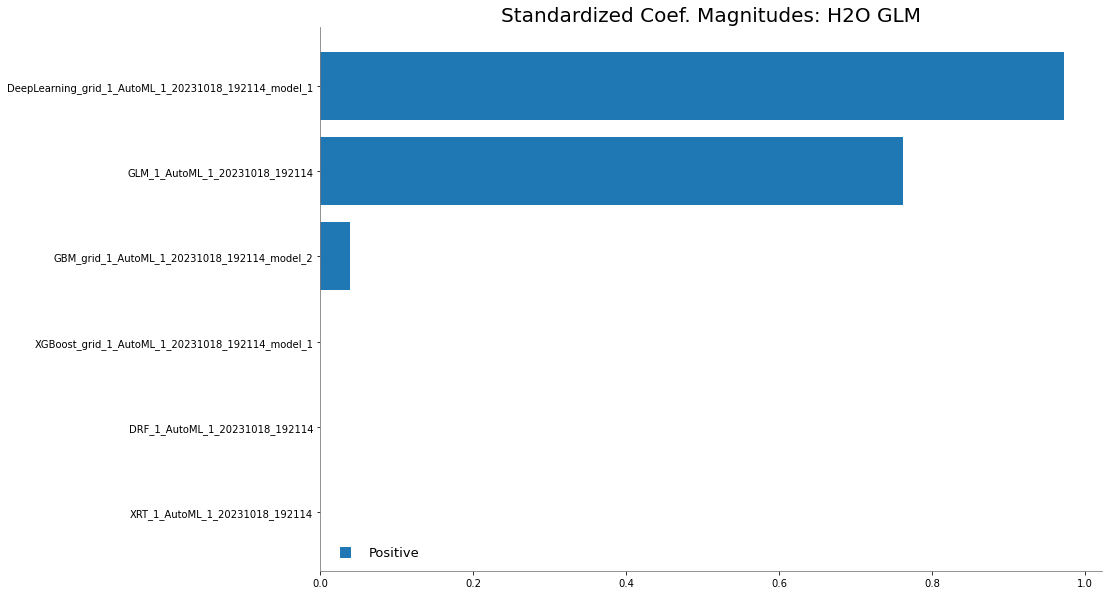

In [132]:
metalearner.std_coef_plot()


# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse       mse    training_time_ms    predict_time_per_row_ms  algo               predict        p0        p1
-------------------------------------------------------  --------  ---------  --------  ----------------------  --------  --------  ------------------  -------------------------  ---------------  ---------  --------  --------
GLM_1_AutoML_1_20231018_192114                           0.820451   0.476518  0.771876                0.247239  0.396743  0.157405                 160                   0.068989  GLM                      1  0.302938  0.697062
GBM_grid_1_AutoML_1_20231018_192114_model_3              0.81654    0.498666  0.707878                0.23568   0.408738  0.167066                 112                   0.062074  GBM                      1  0.392931  0.607069
DRF_1_AutoML_1_20231018_192114                           0.815735   0.495456  0.74298                 0.258282  0.407973  0.166442                 286                   0.079468  DRF                      1  0.156434  0.843566
StackedEnsemble_BestOfFamily_1_AutoML_1_20231018_192114  0.815045   0.490293  0.744487                0.260697  0.401112  0.16089                 2039                   0.147214  StackedEnsemble          1  0.287437  0.712563
GBM_grid_1_AutoML_1_20231018_192114_model_4              0.813435   0.49732   0.718373                0.259489  0.406254  0.165042                 188                   0.032427  GBM                      1  0.323654  0.676346
GBM_5_AutoML_1_20231018_192114                           0.812457   0.494077  0.72977                 0.23568   0.405648  0.164551                 122                   0.038064  GBM                      1  0.171631  0.828369
DeepLearning_grid_3_AutoML_1_20231018_192114_model_2     0.812399   0.565437  0.677094                0.258799  0.421759  0.17788                10518                   0.057154  DeepLearning             1  0.11741   0.88259
GBM_grid_1_AutoML_1_20231018_192114_model_2              0.811364   0.494315  0.725868                0.2343    0.40531   0.164276                 123                   0.045073  GBM                      1  0.30347   0.69653
StackedEnsemble_AllModels_1_AutoML_1_20231018_192114     0.808144   0.513592  0.736042                0.269324  0.408268  0.166683                1586                   0.222294  StackedEnsemble          1  0.238969  0.761031
GBM_2_AutoML_1_20231018_192114                           0.805613   0.497567  0.730221                0.260352  0.409215  0.167457                 133                   0.036114  GBM                      1  0.21959   0.78041
[20 rows x 13 columns]

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

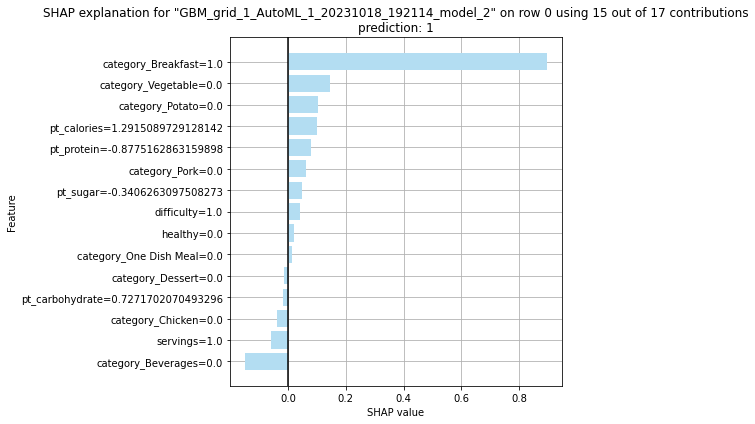

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse       mse    training_time_ms    predict_time_per_row_ms  algo               predict        p0        p1
-------------------------------------------------------  --------  ---------  --------  ----------------------  --------  --------  ------------------  -------------------------  ---------------  ---------  --------  --------
GLM_1_AutoML_1_20231018_192114                           0.820451   0.476518  0.771876                0.247239  0.396743  0.157405                 160                   0.068989  GLM                      1  0.302938  0.697062
GBM_grid_1_AutoML_1_20231018_192114_model_3              0.81654    0.498666  0.707878                0.23568   0.408738  0.167066                 112                   0.062074  GBM                      1  0.392931  0.607069
DRF_1_AutoML_1_20231018_192114                           0.815735   0.495456  0.74298                 0.258282  0.407973  0.166442                 286                   0.079468  DRF                      1  0.156434  0.843566
StackedEnsemble_BestOfFamily_1_AutoML_1_20231018_192114  0.815045   0.490293  0.744487                0.260697  0.401112  0.16089                 2039                   0.147214  StackedEnsemble          1  0.287437  0.712563
GBM_grid_1_AutoML_1_20231018_192114_model_4              0.813435   0.49732   0.718373                0.259489  0.406254  0.165042                 188                   0.032427  GBM                      1  0.323654  0.676346
GBM_5_AutoML_1_20231018_192114                           0.812457   0.494077  0.72977                 0.23568   0.405648  0.164551                 122                   0.038064  GBM                      1  0.171631  0.828369
DeepLearning_grid_3_AutoML_1_20231018_192114_model_2     0.812399   0.565437  0.677094                0.258799  0.421759  0.17788                10518                   0.057154  DeepLearning             1  0.11741   0.88259
GBM_grid_1_AutoML_1_20231018_192114_model_2              0.811364   0.494315  0.725868                0.2343    0.40531   0.164276                 123                   0.045073  GBM                      1  0.30347   0.69653
StackedEnsemble_AllModels_1_AutoML_1_20231018_192114     0.808144   0.513592  0.736042                0.269324  0.408268  0.166683                1586                   0.222294  StackedEnsemble          1  0.238969  0.761031
GBM_2_AutoML_1_20231018_192114                           0.805613   0.497567  0.730221                0.260352  0.409215  0.167457                 133                   0.036114  GBM                      1  0.21959   0.78041
[20 rows x 13 columns]

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

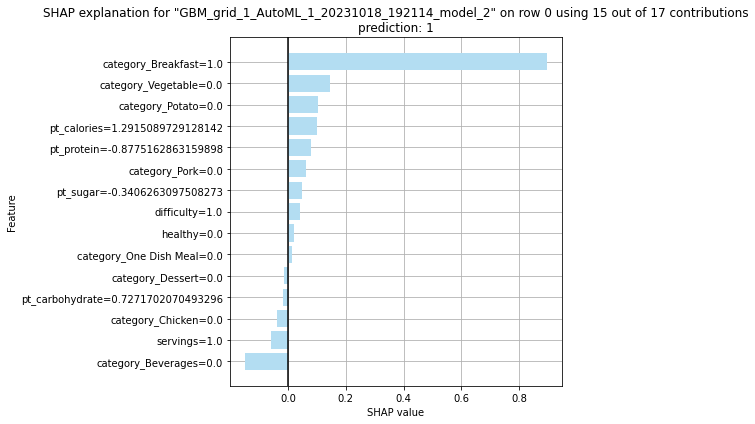

In [136]:
aml.explain_row(frame = test, row_index = 0, figsize = (8,6))


In [137]:
best_model.model_performance(test)

ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.1608904452621204
RMSE: 0.401111512253289
LogLoss: 0.49029314585800043
AUC: 0.8150448585231194
AUCPR: 0.744487353384888
Gini: 0.6300897170462387
Null degrees of freedom: 194
Residual degrees of freedom: 191
Null deviance: 255.50944897780315
Residual deviance: 191.2143268846201
AIC: 199.2143268846201

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4344924774689521
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      95   31   0.246    (31.0/126.0)
1      19   50   0.2754   (19.0/69.0)
Total  114  81   0.2564   (50.0/195.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.434492     0.666667  80
max f2                       0.151928     0.800971  135
max f0point5                 0.619879     0.701357  37
max accuracy                 0.619879     0.769231  37
max precision                0.924169     1         0
max recall                   0.00722796   1         180
max specificity              0.924169     1         0
max absolute_mcc             0.619879     0.475286  37
max min_per_class_accuracy   0.421786     0.738095  83
max mean_per_class_accuracy  0.434492     0.739303  80
max tns                      0.924169     126       0
max fns                      0.924169     68        0
max fps                      0.00160729   126       194
max tps                      0.00722796   69        180
max tnr                      0.924169     1         0
max fnr                      0.924169     0.985507  0
max fpr                      0.00160729   1         194
max tpr                      0.00722796   1         180

Gains/Lift Table: Avg response rate: 35.38 %, avg score: 38.09 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0102564                   0.916987           2.82609   2.82609            1                0.921677    1                           0.921677            0.0289855       0.0289855                  182.609   182.609            0.0289855
2        0.0205128                   0.909072           2.82609   2.82609            1                0.916065    1                           0.918871            0.0289855       0.057971                   182.609   182.609            0.057971
3        0.0307692                   0.906824           2.82609   2.82609            1                0.908086    1                           0.915276            0.0289855       0.0869565                  182.609   182.609            0.0869565
4        0.0410256                   0.903519           2.82609   2.82609            1                0.906413    1                           0.91306             0.0289855       0.115942                   182.609   182.609            0.115942
5        0.0512821                   0.896313           2.82609   2.82609            1                0.900601    1                           0.910568            0.0289855       0.144928                   182.609   182.609            0.144928
6        0.102564                    0.717868           2.26087   2.54348            0.8              0.845301    0.9                         0.877935            0.115942        0.26087                    126.087   154.348            0.244997
7        0.153846                    0.648876           1.97826   2.35507            0.7              0.680849    0.833333                    0.812239          

In [138]:
import os

# Define the directory where you want to save the model
save_dir = os.getcwd()

# Save the leader model
model_path = h2o.save_model(model=aml.leader, path=save_dir, force=True)
print("Model saved to:", model_path)


Model saved to: /Users/stephaniegessler/Documents/Datacamp/StackedEnsemble_BestOfFamily_1_AutoML_1_20231018_192114


In [97]:
h2o.shutdown()

H2O session _sid_b960 closed.


/var/folders/ks/5bc1x9p158vgc4774v7r2tq40000gn/T/ipykernel_2706/2900054706.py:1: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown()


In [98]:
model = h2o.get_model('XGBoost_grid__1_AutoML_20200714_173719_model_5')
model.model_performance(test)


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_371"; Java(TM) SE Runtime Environment (build 1.8.0_371-b11); Java HotSpot(TM) 64-Bit Server VM (build 25.371-b11, mixed mode)
  Starting server from /Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/ks/5bc1x9p158vgc4774v7r2tq40000gn/T/tmp2pgeuwr4
  JVM stdout: /var/folders/ks/5bc1x9p158vgc4774v7r2tq40000gn/T/tmp2pgeuwr4/h2o_stephaniegessler_started_from_python.out
  JVM stderr: /var/folders/ks/5bc1x9p158vgc4774v7r2tq40000gn/T/tmp2pgeuwr4/h2o_stephaniegessler_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ---------------------------------------
H2O_cluster_uptime:         13 secs
H2O_cluster_timezone:       Europe/Zurich
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.1
H2O_cluster_version_age:    2 days
H2O_cluster_name:           H2O_from_python_stephaniegessler_nx85rq
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.542 Gb
H2O_cluster_total_cores:    0
H2O_cluster_allowed_cores:  0
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.9.12 final
--------------------------  ---------------------------------------

H2OResponseError: Server error water.exceptions.H2OIllegalArgumentException:
  Error: Illegal argument: dir of function: importModel: water.api.FSIOException: FS IO Failure: 
 accessed path : file:/Users/stephaniegessler/Documents/Datacamp/C:%5CUsers%5Ckayla%5Crecipe_site_traffic%5CStackedEnsemble_AllModels_AutoML_20210222_210821 msg: File not found
  Request: POST /99/Models.bin/
    data: {'dir': 'C:\\Users\\kayla\\recipe_site_traffic\\StackedEnsemble_AllModels_AutoML_20210222_210821'}


In [ ]:
best_model.model_performance(test)

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.138221236018322
RMSE: 0.3717811668418964
LogLoss: 0.42101371433305823
Mean Per-Class Error: 0.22394755003450656
AUC: 0.8711755233494364
AUCPR: 0.8131805514594146
Gini: 0.7423510466988728

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.32790447461294825
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      86   40   0.3175   (40.0/126.0)
1      9    60   0.1304   (9.0/69.0)
Total  95   100  0.2513   (49.0/195.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.327904     0.710059  86
max f2                       0.263662     0.833333  110
max f0point5                 0.608669     0.780488  33
max accuracy                 0.608669     0.8       33
max precision                0.912132     1         0
max recall                   0.191155     1         115
max specificity              0.912132     1         0
max absolute_mcc             0.608669     0.564461  33
max min_per_class_accuracy   0.357433     0.768116  72
max mean_per_class_accuracy  0.327904     0.776052  86
max tns                      0.912132     126       0
max fns                      0.912132     68        0
max fps                      0.0314352    126       160
max tps                      0.191155     69        115
max tnr                      0.912132     1         0
max fnr                      0.912132     0.985507  0
max fpr                      0.0314352    1         160
max tpr                      0.191155     1         115

Gains/Lift Table: Avg response rate: 35.38 %, avg score: 36.69 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0102564                   0.910425           2.82609   2.82609            1                0.911445   1                           0.911445            0.0289855       0.0289855                  182.609   182.609            0.0289855
2        0.0205128                   0.903492           2.82609   2.82609            1                0.908843   1                           0.910144            0.0289855       0.057971                   182.609   182.609            0.057971
3        0.0307692                   0.901095           2.82609   2.82609            1                0.902919   1                           0.907736            0.0289855       0.0869565                  182.609   182.609            0.0869565
4        0.0410256                   0.895992           2.82609   2.82609            1                0.898836   1                           0.905511            0.0289855       0.115942                   182.609   182.609            0.115942
5        0.0512821                   0.89354            2.82609   2.82609            1                0.895071   1                           0.903423            0.0289855       0.144928                   182.609   182.609            0.144928
6        0.102564                    0.736785           2.82609   2.82609            1                0.846865   1                           0.875144            0.144928        0.289855                   182.609   182.609            0.289855
7        0.153846                    0.633673           2.26087   2.63768            0.8              0.702555   0.933333                    0.817614            0.115942        0.405797                   126.087   163.768            0.389924
8        0.2                         0.594266         

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                   auc    logloss     aucpr    mean_per_class_error      rmse        mse    training_time_ms    predict_time_per_row_ms  algo
----------------------------------------------------  --------  ---------  --------  ----------------------  --------  ---------  ------------------  -------------------------  ---------------
DRF_1_AutoML_5_20231018_131105                        0.999264   0.133356  0.998856              0.00797517  0.163755  0.0268158                 294                   0.018206  DRF
XGBoost_grid_1_AutoML_5_20231018_131105_model_5       0.987634   0.216268  0.981692              0.0518725   0.237109  0.0562205                 150                   0.009763  XGBoost
DeepLearning_grid_3_AutoML_5_20231018_131105_model_1  0.979323   0.190604  0.968259              0.0690278   0.234172  0.0548364               20612                   0.027122  DeepLearning
DeepLearning_grid_2_AutoML_5_20231018_131105_model_1  0.977277   0.202654  0.95823               0.0709008   0.241141  0.0581489               16264                   0.018661  DeepLearning
XRT_1_AutoML_5_20231018_131105                        0.970117   0.460782  0.958584              0.0903401   0.385772  0.14882                   131                   0.010823  DRF
GBM_4_AutoML_5_20231018_131105                        0.962698   0.340839  0.948694              0.107162    0.316507  0.100177                  143                   0.012204  GBM
XGBoost_grid_1_AutoML_5_20231018_131105_model_2       0.95919    0.306843  0.937092              0.0897353   0.298133  0.0888835                 133                   0.008448  XGBoost
GBM_grid_1_AutoML_5_20231018_131105_model_1           0.958503   0.363399  0.934141              0.111048    0.327246  0.10709                   146                   0.012439  GBM
XGBoost_2_AutoML_5_20231018_131105                    0.94823    0.335311  0.920335              0.122773    0.316567  0.100215                  111                   0.008841  XGBoost
XGBoost_3_AutoML_5_20231018_131105                    0.944681   0.341619  0.919233              0.141811    0.32262   0.104084                  101                   0.008038  XGBoost
GBM_3_AutoML_5_20231018_131105                        0.943109   0.361628  0.922054              0.138385    0.331796  0.110089                  134                   0.02103   GBM
GBM_5_AutoML_5_20231018_131105                        0.942782   0.368265  0.922174              0.145421    0.336511  0.11324                   111                   0.010429  GBM
GBM_2_AutoML_5_20231018_131105                        0.931635   0.38225   0.907559              0.160835    0.343186  0.117777                  188                   0.011171  GBM
XGBoost_grid_1_AutoML_5_20231018_131105_model_1       0.916701   0.390785  0.882946              0.171418    0.348689  0.121584                  102                   0.012284  XGBoost
StackedEnsemble_AllModels_1_AutoML_5_20231018_131105  0.916575   0.390772  0.882122              0.1554      0.352887  0.124529                 1747                   0.054964  StackedEnsemble
XGBoost_grid_1_AutoML_5_20231018_131105_model_3       0.905545   0.410061  0.868751              0.186832    0.359028  0.128901                  128                   0.008027  XGBoost
DeepLearning_grid_1_AutoML_5_20231018_131105_model_1  0.902866   0.392292  0.853528              0.171089    0.353112  0.124688                 8793                   0.010717  DeepLearning
XGBoost_1_AutoML_5_20231018_131105                    0.900045   0.42192   0.850651              0.19427     0.365867  0.133858                   95                   0.010455  XGBoost
GBM_grid_1_AutoML_5_20231018_131105_model_4           0.899464   0.428411  0.863583              0.195876    0.368858  0.136056                  151                   0.013279  GBM
GBM_grid_1_AutoML_5_20231018_131105_model_3           0.896348   0.420451  0.85959               0.185694    0.366476  

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_grid_1_AutoML_5_20231018_131105_model_2

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3653391478546515
       0    1    Error    Rate
-----  ---  ---  -------  -------------
0      441  133  0.2317   (133.0/574.0)
1      76   297  0.2038   (76.0/373.0)
Total  517  430  0.2207   (209.0/947.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

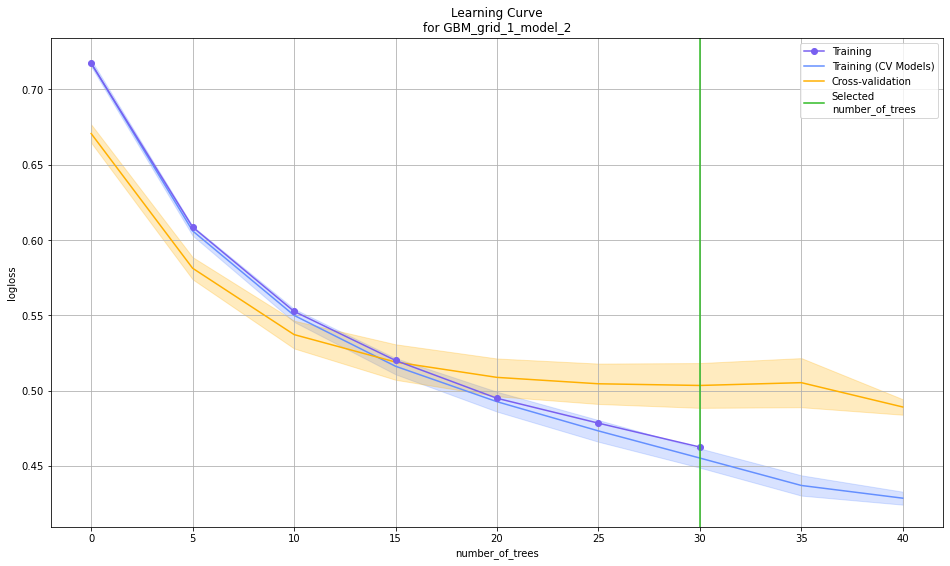

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

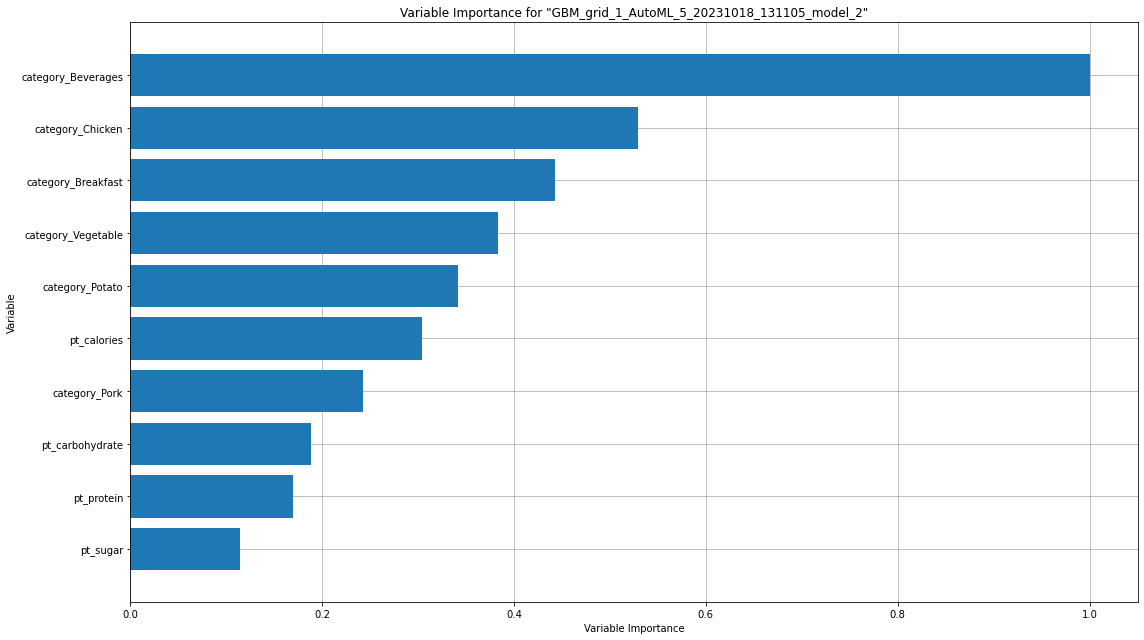

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

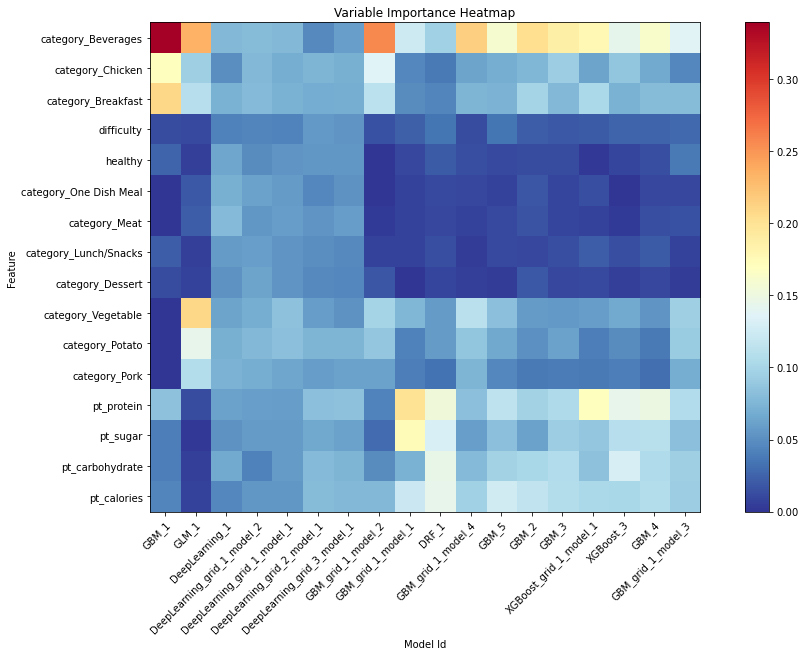

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

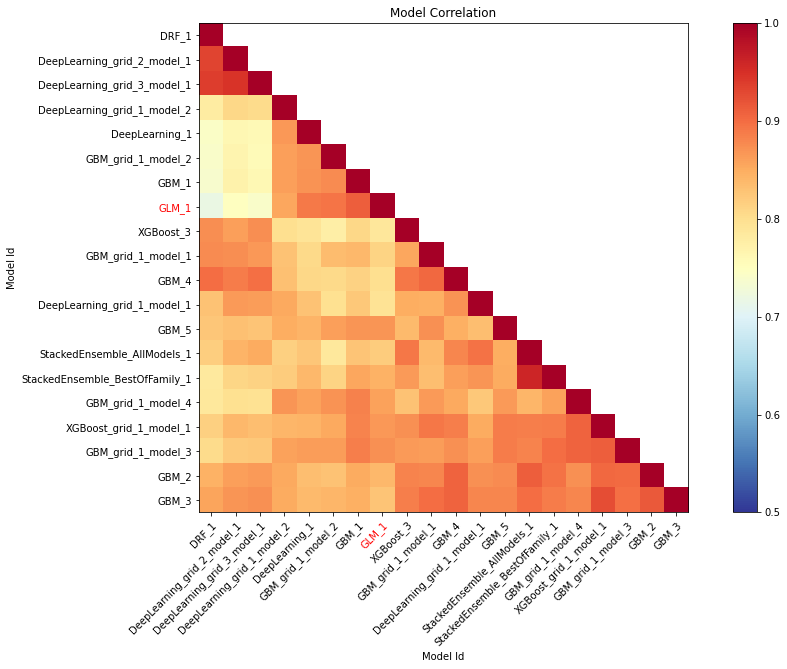

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

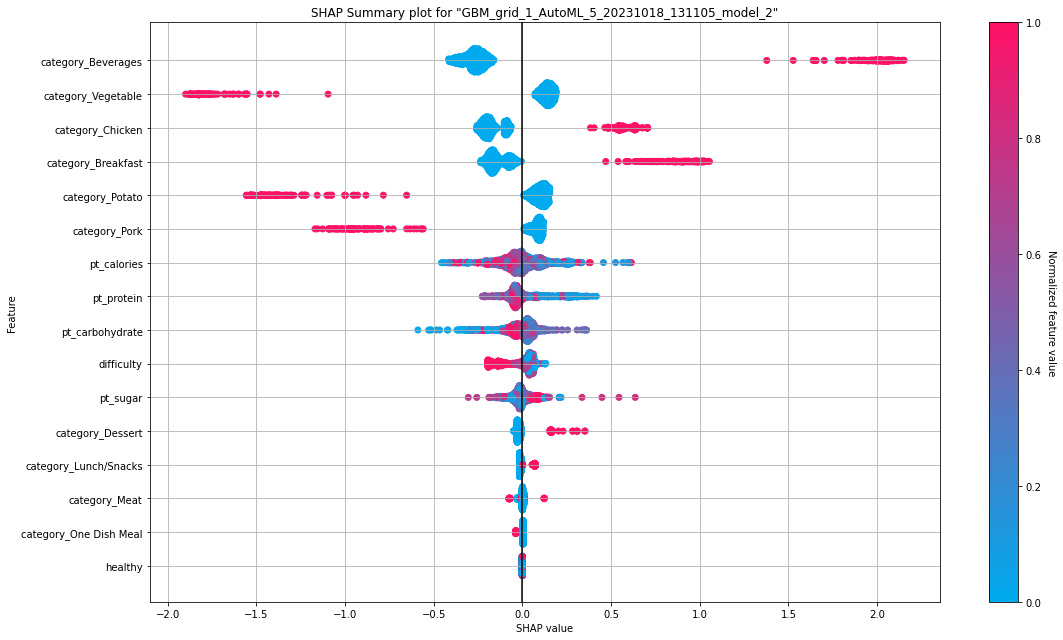

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

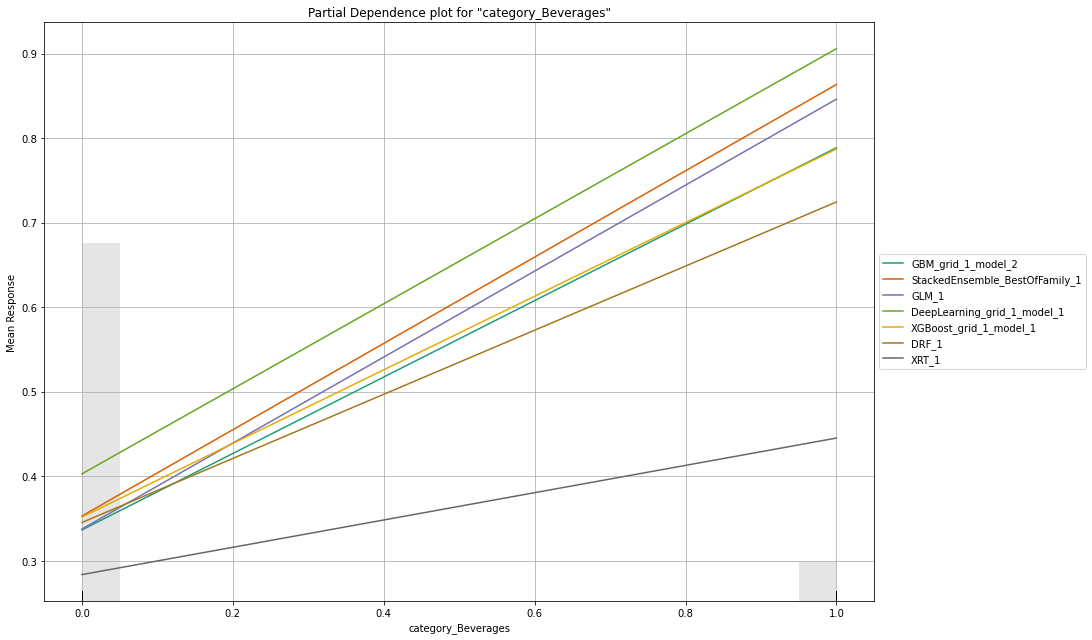

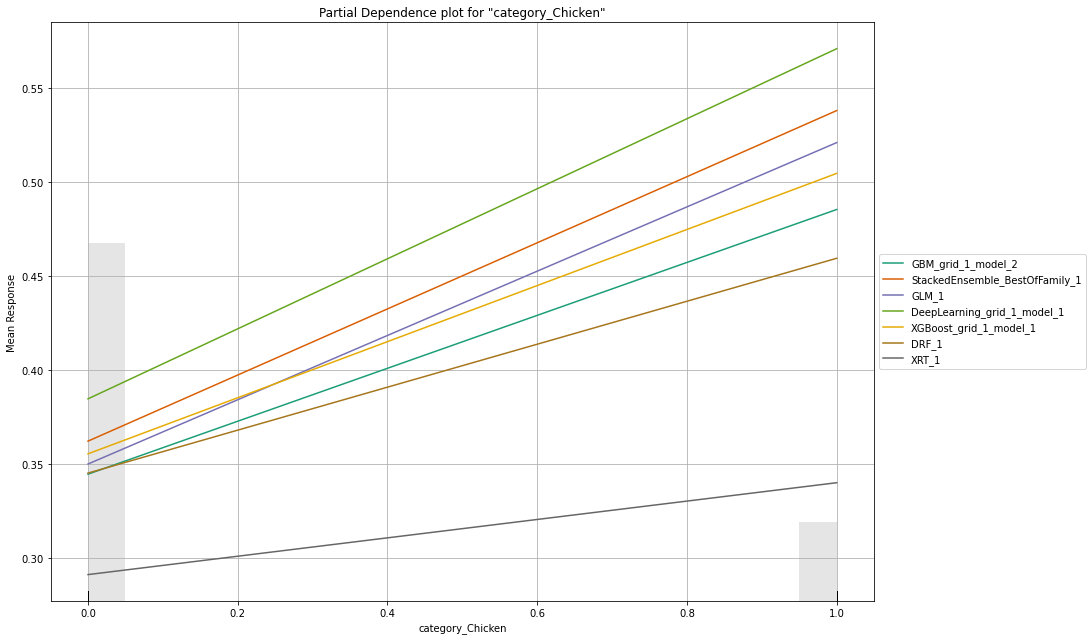

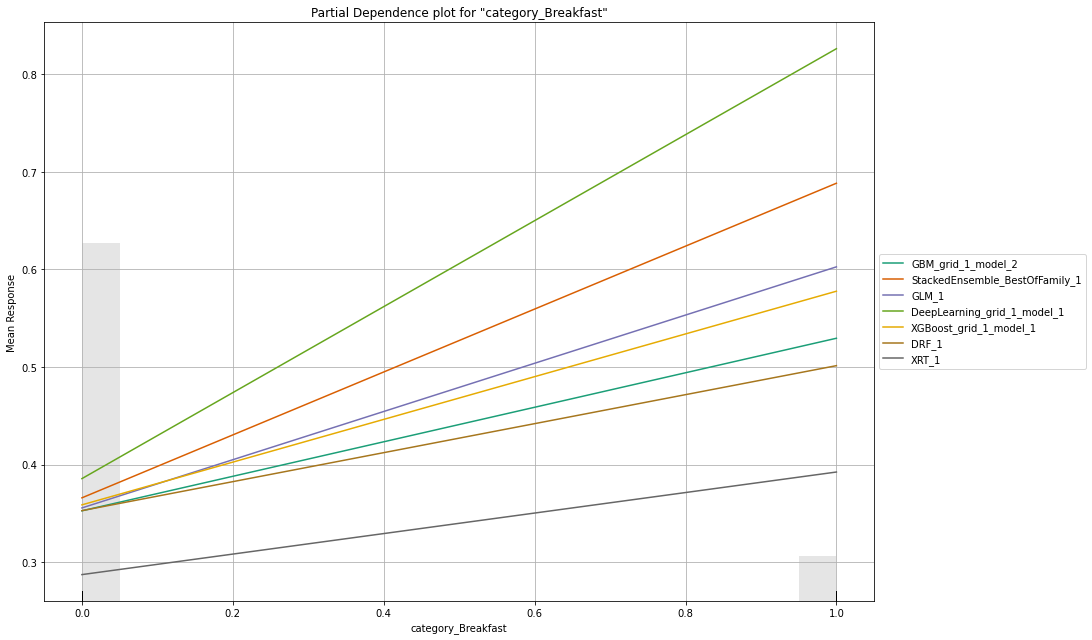

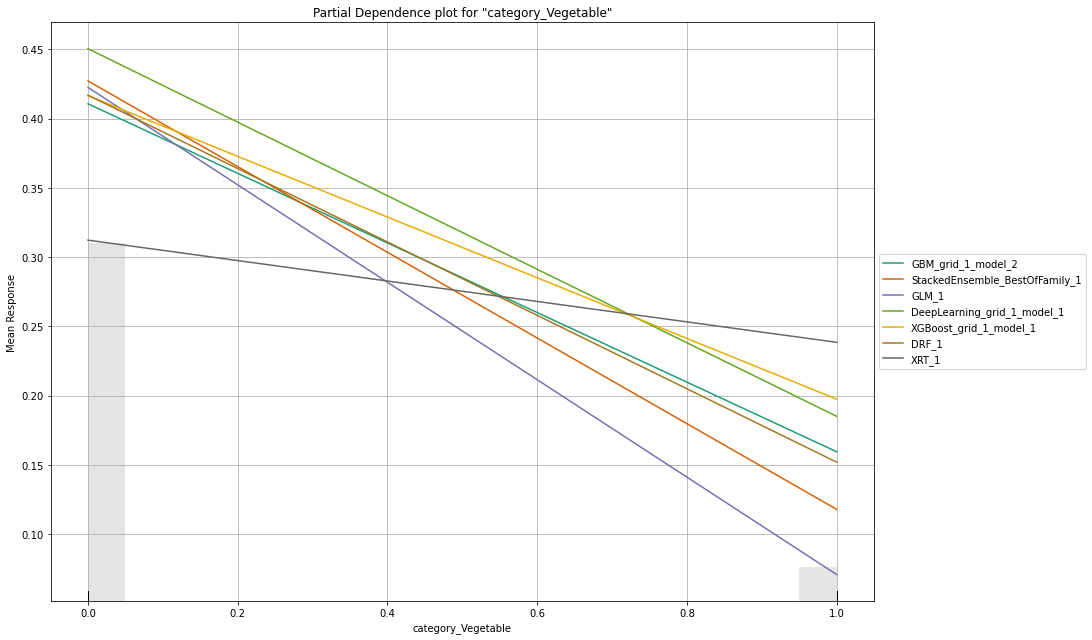

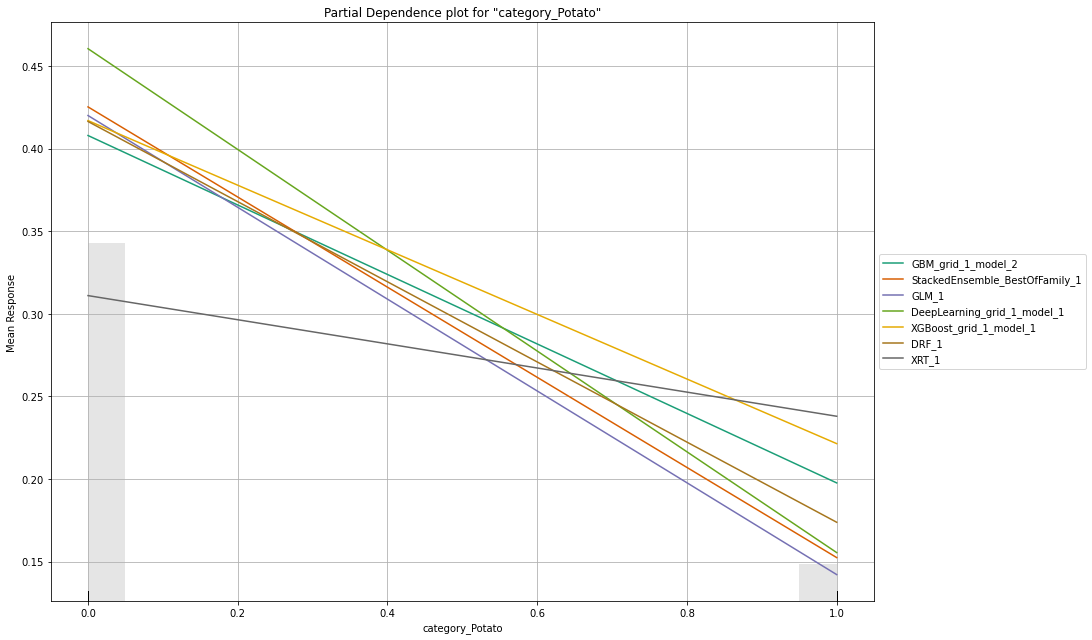

In [ ]:
# Explanation
explanation = h2o.explain(aml, h2o_df)

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                   auc    logloss     aucpr    mean_per_class_error      rmse        mse    training_time_ms    predict_time_per_row_ms  algo            predict        p0        p1
----------------------------------------------------  --------  ---------  --------  ----------------------  --------  ---------  ------------------  -------------------------  ------------  ---------  --------  --------
DRF_1_AutoML_5_20231018_131105                        0.999367   0.123011  0.998813              0.00396825  0.154279  0.0238021                 294                   0.064899  DRF                   0  0.863157  0.136843
DeepLearning_grid_3_AutoML_5_20231018_131105_model_1  0.982229   0.184522  0.97314               0.0521049   0.227823  0.0519035               20612                   0.047436  DeepLearning          0  0.84449   0.15551
XGBoost_grid_1_AutoML_5_20231018_131105_model_5       0.980274   0.223005  0.971908              0.0448585   0.243491  0.0592878                 150                   0.029932  XGBoost               0  0.705941  0.294059
DeepLearning_grid_2_AutoML_5_20231018_131105_model_1  0.975788   0.204197  0.961863              0.0672878   0.246899  0.0609591               16264                   0.042656  DeepLearning          0  0.770475  0.229525
XRT_1_AutoML_5_20231018_131105                        0.973372   0.433261  0.959738              0.0890269   0.369033  0.136185                  131                   0.027486  DRF                   0  0.805183  0.194817
XGBoost_grid_1_AutoML_5_20231018_131105_model_2       0.963251   0.28395   0.945725              0.0778123   0.284521  0.0809519                 133                   0.028036  XGBoost               0  0.72558   0.27442
GBM_4_AutoML_5_20231018_131105                        0.96003    0.324663  0.943186              0.110766    0.306282  0.0938087                 143                   0.028664  GBM                   0  0.774377  0.225623
GBM_3_AutoML_5_20231018_131105                        0.951403   0.335     0.934476              0.118703    0.31467   0.0990172                 134                   0.031358  GBM                   0  0.699967  0.300033
XGBoost_2_AutoML_5_20231018_131105                    0.941971   0.335938  0.909173              0.121463    0.319589  0.102137                  111                   0.0262    XGBoost               0  0.75985   0.24015
XGBoost_3_AutoML_5_20231018_131105                    0.936968   0.341837  0.914373              0.126639    0.32588   0.106198                  101                   0.023464  XGBoost               0  0.660807  0.339193
[20 rows x 13 columns]

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

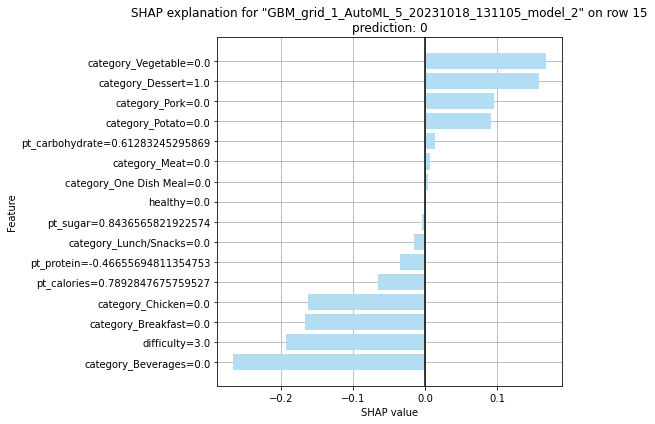

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                   auc    logloss     aucpr    mean_per_class_error      rmse        mse    training_time_ms    predict_time_per_row_ms  algo            predict        p0        p1
----------------------------------------------------  --------  ---------  --------  ----------------------  --------  ---------  ------------------  -------------------------  ------------  ---------  --------  --------
DRF_1_AutoML_5_20231018_131105                        0.999367   0.123011  0.998813              0.00396825  0.154279  0.0238021                 294                   0.064899  DRF                   0  0.863157  0.136843
DeepLearning_grid_3_AutoML_5_20231018_131105_model_1  0.982229   0.184522  0.97314               0.0521049   0.227823  0.0519035               20612                   0.047436  DeepLearning          0  0.84449   0.15551
XGBoost_grid_1_AutoML_5_20231018_131105_model_5       0.980274   0.223005  0.971908              0.0448585   0.243491  0.0592878                 150                   0.029932  XGBoost               0  0.705941  0.294059
DeepLearning_grid_2_AutoML_5_20231018_131105_model_1  0.975788   0.204197  0.961863              0.0672878   0.246899  0.0609591               16264                   0.042656  DeepLearning          0  0.770475  0.229525
XRT_1_AutoML_5_20231018_131105                        0.973372   0.433261  0.959738              0.0890269   0.369033  0.136185                  131                   0.027486  DRF                   0  0.805183  0.194817
XGBoost_grid_1_AutoML_5_20231018_131105_model_2       0.963251   0.28395   0.945725              0.0778123   0.284521  0.0809519                 133                   0.028036  XGBoost               0  0.72558   0.27442
GBM_4_AutoML_5_20231018_131105                        0.96003    0.324663  0.943186              0.110766    0.306282  0.0938087                 143                   0.028664  GBM                   0  0.774377  0.225623
GBM_3_AutoML_5_20231018_131105                        0.951403   0.335     0.934476              0.118703    0.31467   0.0990172                 134                   0.031358  GBM                   0  0.699967  0.300033
XGBoost_2_AutoML_5_20231018_131105                    0.941971   0.335938  0.909173              0.121463    0.319589  0.102137                  111                   0.0262    XGBoost               0  0.75985   0.24015
XGBoost_3_AutoML_5_20231018_131105                    0.936968   0.341837  0.914373              0.126639    0.32588   0.106198                  101                   0.023464  XGBoost               0  0.660807  0.339193
[20 rows x 13 columns]

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

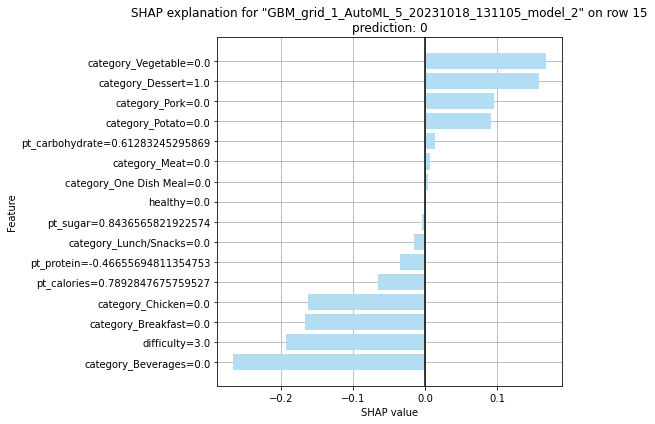

In [ ]:
aml.explain_row(frame = test, row_index = 15, figsize = (8,6))

In [ ]:
#do automl with h2o to see a list of models and baselines 
import h2o
from h2o.automl import H2OAutoML
h2o.init()
h2o_df = h2o.H2OFrame(df)
h2o_df['high_traffic'] = h2o_df['high_traffic'].asfactor()
h2o_df.head()
aml = H2OAutoML(max_models=20, seed=1)
aml.train(y='high_traffic', training_frame=h2o_df)
lb = aml.leaderboard
lb.head(rows=lb.nrows)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  ---------------------------------------
H2O_cluster_uptime:         5 hours 9 mins
H2O_cluster_timezone:       Europe/Zurich
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.1
H2O_cluster_version_age:    2 days
H2O_cluster_name:           H2O_from_python_stephaniegessler_eeg3l1
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.432 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.9.12 final
--------------------------  ---------------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse       mse
-------------------------------------------------------  --------  ---------  --------  ----------------------  --------  --------
GLM_1_AutoML_6_20231018_131623                           0.814852   0.495322  0.736222                0.249907  0.408101  0.166546
StackedEnsemble_BestOfFamily_1_AutoML_6_20231018_131623  0.813729   0.498787  0.73292                 0.257209  0.40922   0.167461
StackedEnsemble_AllModels_1_AutoML_6_20231018_131623     0.813194   0.500009  0.722392                0.256004  0.409707  0.16786
DeepLearning_grid_1_AutoML_6_20231018_131623_model_1     0.811571   0.572134  0.734476                0.281373  0.428086  0.183258
GBM_grid_1_AutoML_6_20231018_131623_model_2              0.810779   0.508931  0.726707                0.251446  0.412957  0.170533
DeepLearning_1_AutoML_6_20231018_131623                  0.807501   0.530088  0.731946                0.276219  0.420517  0.176835
GBM_5_AutoML_6_20231018_131623                           0.800714   0.520045  0.721669                0.262029  0.419149  0.175686
DeepLearning_grid_3_AutoML_6_20231018_131623_model_1     0.800394   0.584397  0.721468                0.265707  0.43323   0.187688
DeepLearning_grid_2_AutoML_6_20231018_131623_model_1     0.800282   0.588691  0.719529                0.268848  0.433934  0.188299
GBM_2_AutoML_6_20231018_131623                           0.799687   0.524769  0.722634                0.262368  0.420499  0.176819
GBM_3_AutoML_6_20231018_131623                           0.79694    0.528452  0.715857                0.274094  0.421727  0.177853
GBM_4_AutoML_6_20231018_131623                           0.795249   0.529362  0.713037                0.291158  0.422709  0.178683
XGBoost_3_AutoML_6_20231018_131623                       0.791307   0.540896  0.71467                 0.291971  0.427468  0.182729
DRF_1_AutoML_6_20231018_131623                           0.789944   0.579167  0.701219                0.284799  0.427864  0.183068
GBM_grid_1_AutoML_6_20231018_131623_model_1              0.785404   0.538738  0.703076                0.29773   0.426574  0.181965
XGBoost_grid_1_AutoML_6_20231018_131623_model_2          0.783456   0.542242  0.710881                0.285801  0.430372  0.18522
XGBoost_grid_1_AutoML_6_20231018_131623_model_1          0.777522   0.554154  0.691067                0.286144  0.432446  0.187009
XGBoost_grid_1_AutoML_6_20231018_131623_model_3          0.775537   0.567362  0.702285                0.294913  0.437955  0.191805
XGBoost_2_AutoML_6_20231018_131623                       0.768202   0.565195  0.692386                0.309126  0.4379    0.191756
XGBoost_1_AutoML_6_20231018_131623                       0.748071   0.577134  0.661086                0.300894  0.442124  0.195473
XRT_1_AutoML_6_20231018_131623                           0.701997   0.59846   0.64799                 0.363142  0.453096  0.205296
GBM_1_AutoML_6_20231018_131623                           0.700764   0.606999  0.623657                0.355898  0.457559  0.20936
[22 rows x 7 columns]

In [ ]:
# 

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  ---------------------------------------
H2O_cluster_uptime:         5 hours 13 mins
H2O_cluster_timezone:       Europe/Zurich
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.1
H2O_cluster_version_age:    2 days
H2O_cluster_name:           H2O_from_python_stephaniegessler_eeg3l1
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.419 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.9.12 final
--------------------------  ---------------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## glm_default

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2818874421463302
       0    1    Error    Rate
-----  ---  ---  -------  -------------
0      345  229  0.399    (229.0/574.0)
1      45   328  0.1206   (45.0/373.0)
Total  390  557  0.2893   (274.0/947.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

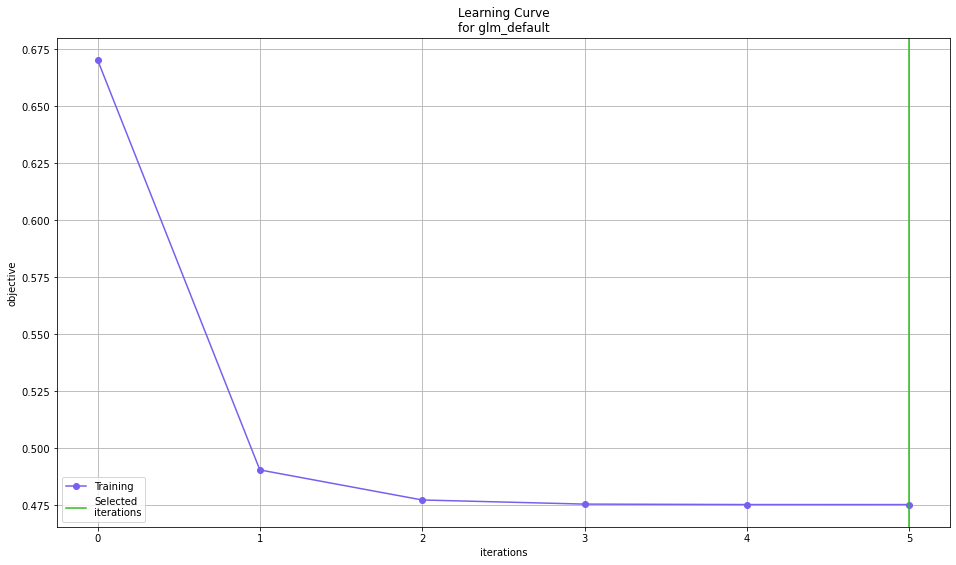

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

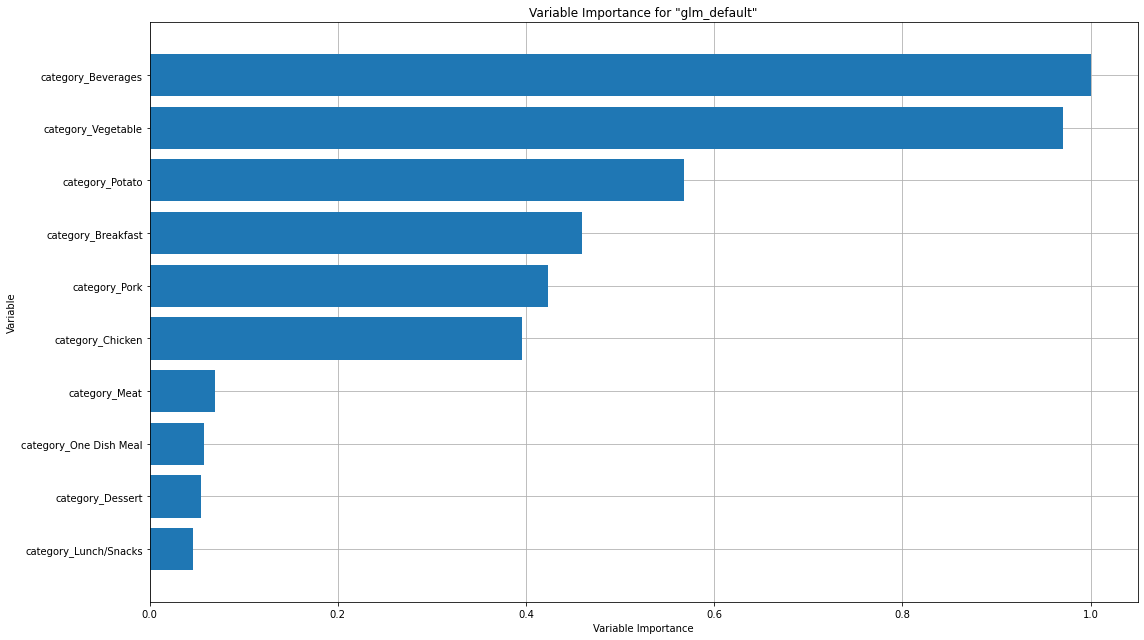

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

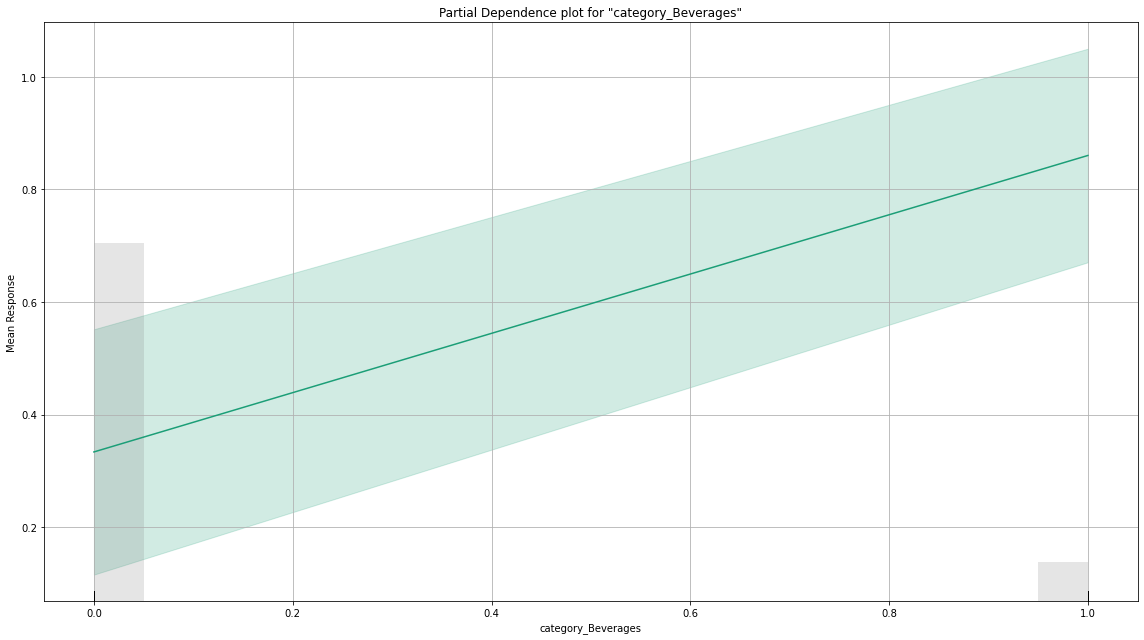

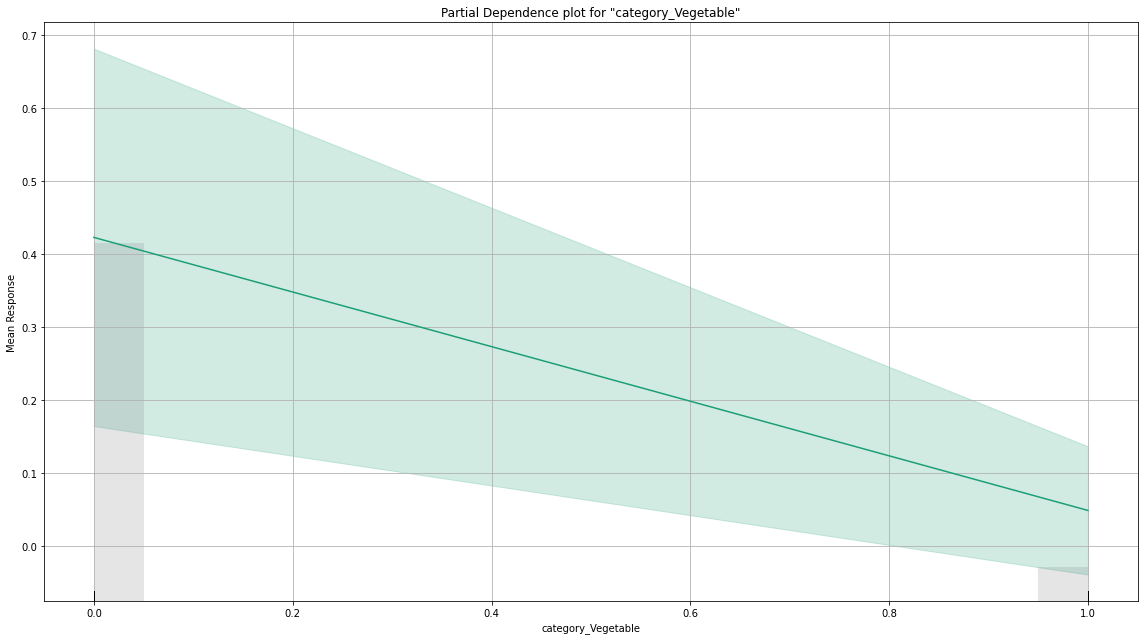

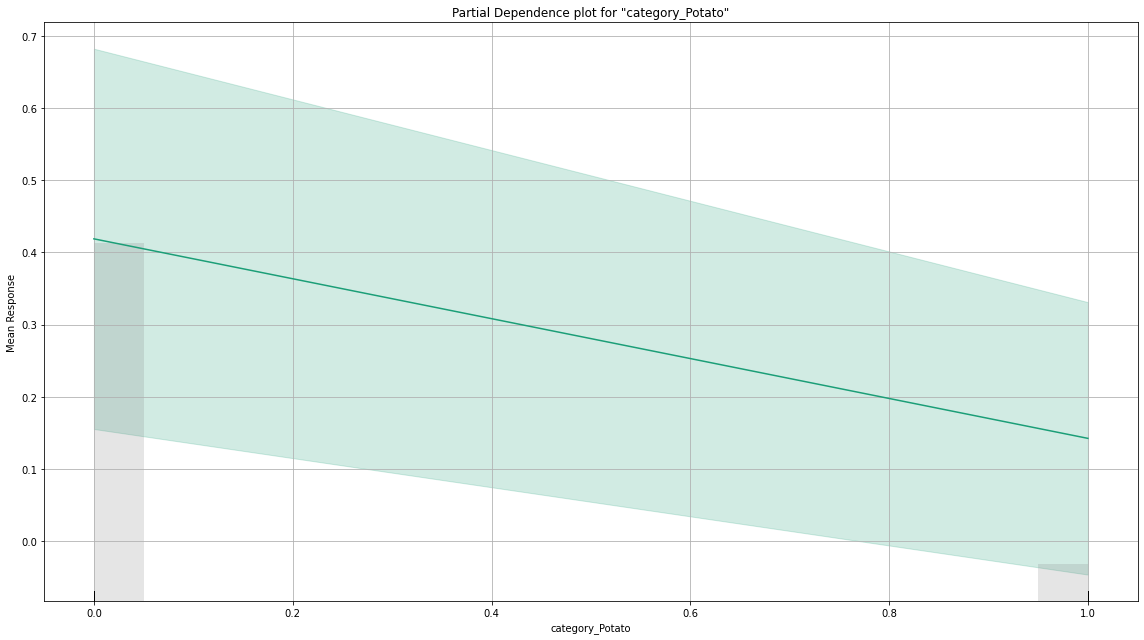

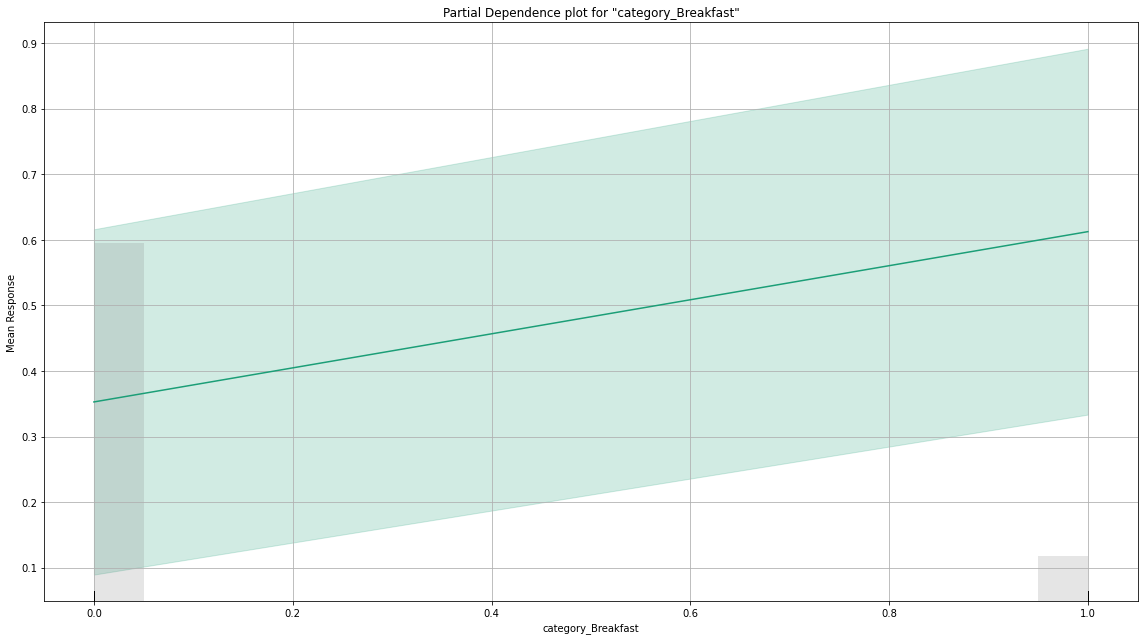

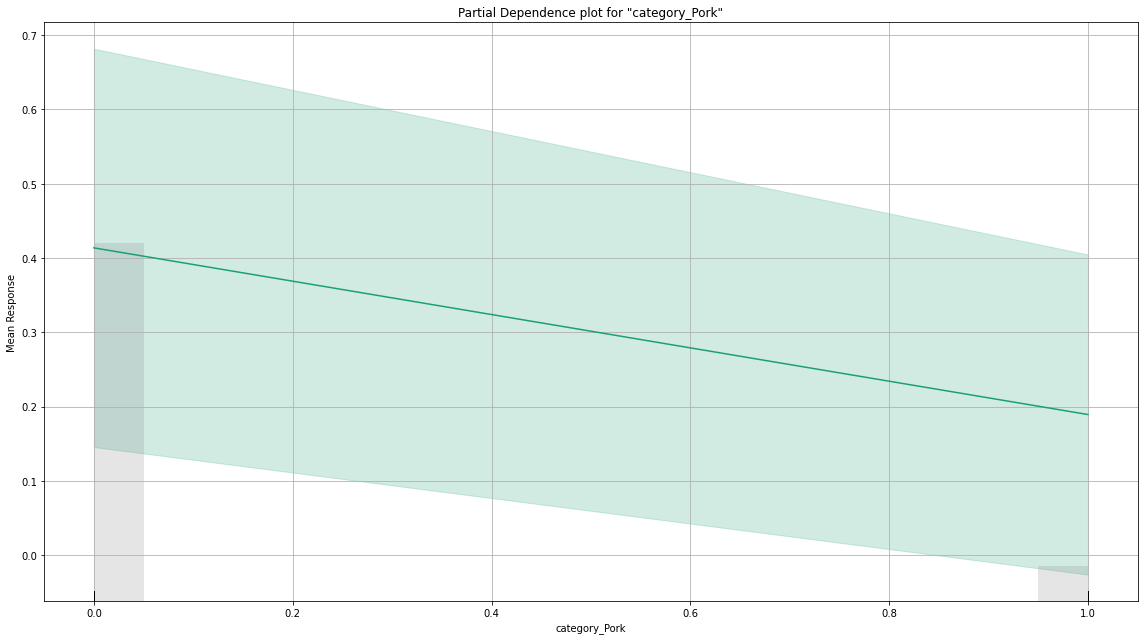

In [ ]:
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

h2o.init()

# Convert the dataframe to H2O Frame
h2o_df = h2o.H2OFrame(df)
h2o_df['high_traffic'] = h2o_df['high_traffic'].asfactor()

# Train a GLM model
glm = H2OGeneralizedLinearEstimator(family='binomial', model_id='glm_default')
glm.train(y='high_traffic', training_frame=h2o_df)

lb = aml.leaderboard
lb.head(rows=lb.nrows)

# Explanation
explanation = h2o.explain(glm, h2o_df)

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse        mse    training_time_ms    predict_time_per_row_ms  algo
-------------------------------------------------------  --------  ---------  --------  ----------------------  --------  ---------  ------------------  -------------------------  ---------------
DRF_1_AutoML_6_20231018_131623                           0.998562   0.144599  0.997148              0.00396825  0.172064  0.0296062                 271                   0.029664  DRF
DeepLearning_grid_3_AutoML_6_20231018_131623_model_1     0.98844    0.144632  0.980561              0.0488268   0.201173  0.0404707               26298                   0.040204  DeepLearning
DeepLearning_grid_2_AutoML_6_20231018_131623_model_1     0.985047   0.179134  0.980882              0.0441684   0.213954  0.0457763               17725                   0.055785  DeepLearning
XRT_1_AutoML_6_20231018_131623                           0.973602   0.433689  0.959905              0.073844    0.360395  0.129885                  113                   0.022302  DRF
GBM_grid_1_AutoML_6_20231018_131623_model_1              0.957499   0.344337  0.934579              0.101622    0.316359  0.100083                  142                   0.022441  GBM
GBM_4_AutoML_6_20231018_131623                           0.956809   0.335278  0.940207              0.0995514   0.311841  0.0972448                 104                   0.027273  GBM
GBM_5_AutoML_6_20231018_131623                           0.952669   0.336177  0.926719              0.118185    0.316894  0.100422                  117                   0.028294  GBM
XGBoost_grid_1_AutoML_6_20231018_131623_model_3          0.950943   0.305529  0.930493              0.0950656   0.300017  0.0900101                 142                   0.036018  XGBoost
GBM_3_AutoML_6_20231018_131623                           0.946802   0.350565  0.930065              0.119393    0.320911  0.102984                  102                   0.021475  GBM
XGBoost_grid_1_AutoML_6_20231018_131623_model_2          0.937946   0.343723  0.914968              0.132678    0.321178  0.103155                  106                   0.02309   XGBoost
XGBoost_3_AutoML_6_20231018_131623                       0.927019   0.339034  0.902026              0.137854    0.322023  0.103699                  112                   0.018749  XGBoost
GBM_2_AutoML_6_20231018_131623                           0.923108   0.370055  0.894757              0.137854    0.335289  0.112418                  106                   0.020801  GBM
XGBoost_2_AutoML_6_20231018_131623                       0.919082   0.359846  0.878322              0.16891     0.336141  0.112991                  192                   0.017405  XGBoost
XGBoost_grid_1_AutoML_6_20231018_131623_model_1          0.90597    0.383257  0.868622              0.1696      0.346109  0.119792                  105                   0.020547  XGBoost
DeepLearning_grid_1_AutoML_6_20231018_131623_model_1     0.903094   0.386792  0.854126              0.156487    0.351753  0.123731                 7916                   0.049646  DeepLearning
XGBoost_1_AutoML_6_20231018_131623                       0.876006   0.428753  0.810452              0.201346    0.370158  0.137017                  112                   0.020432  XGBoost
StackedEnsemble_AllModels_1_AutoML_6_20231018_131623     0.874799   0.422792  0.827303              0.202036    0.370169  0.137025                 1412                   0.073384  StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_6_20231018_131623  0.873648   0.427192  0.823269              0.194099    0.373048  0.139165                 1400                   0.069722  StackedEnsemble
GBM_grid_1_AutoML_6_20231018_131623_model_2              0.86738    0.430313  0.82135               0.23844     0.37454   0.14028                   101                   0.02102   GBM
DeepLearning_1_AutoML_6_20231018_131623         

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GLM_1_AutoML_6_20231018_131623

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.28100284730282454
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      74   52   0.4127   (52.0/126.0)
1      8    61   0.1159   (8.0/69.0)
Total  82   113  0.3077   (60.0/195.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

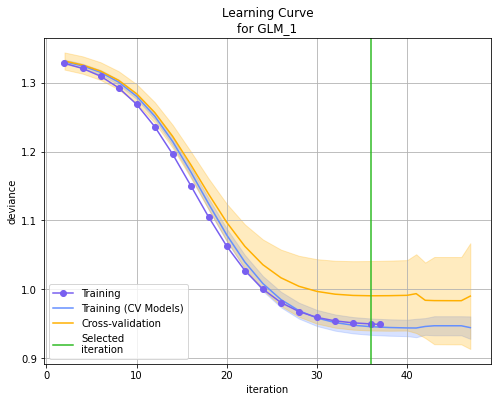

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

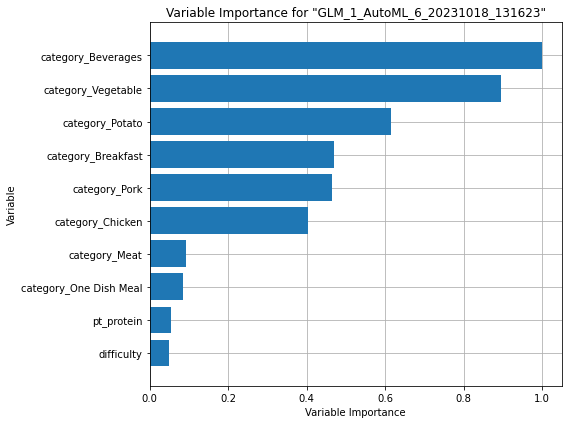

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

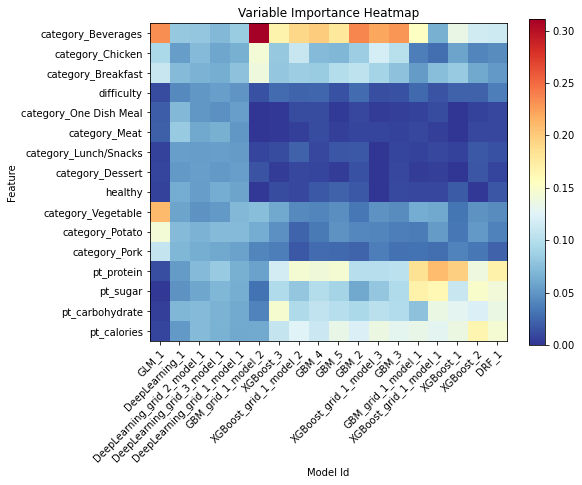

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

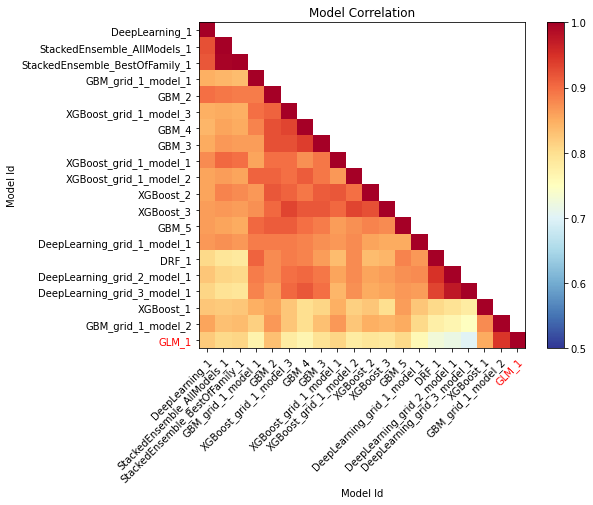

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

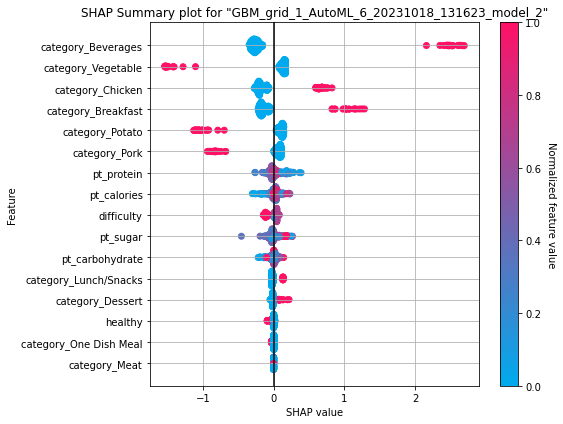

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

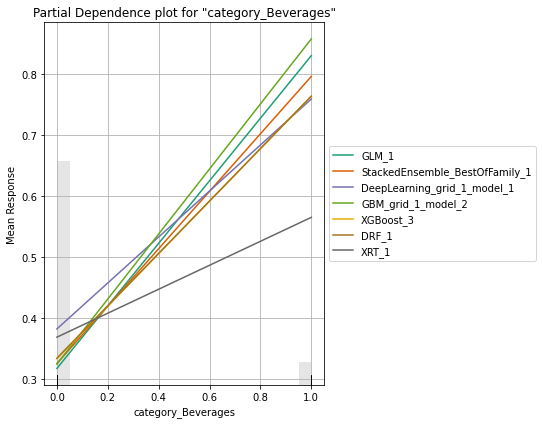

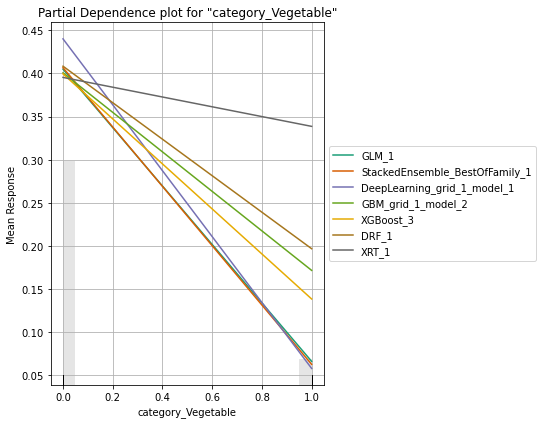

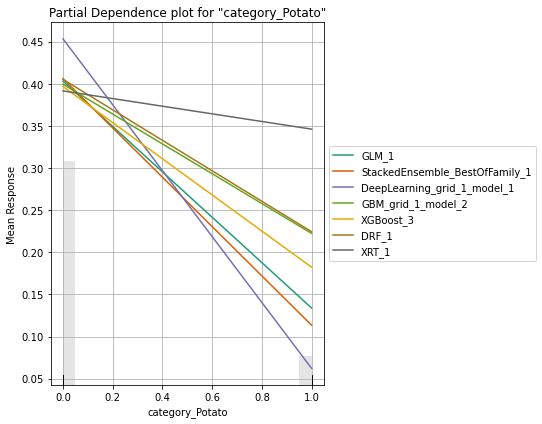

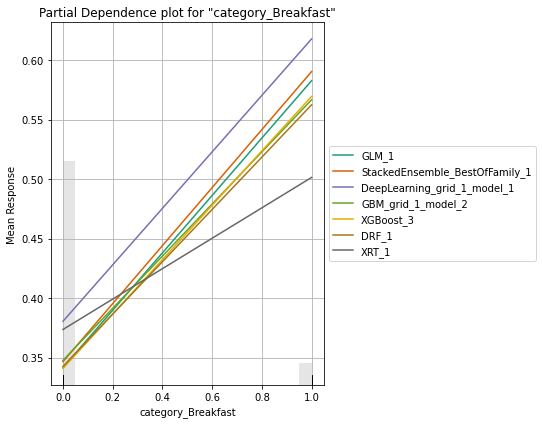

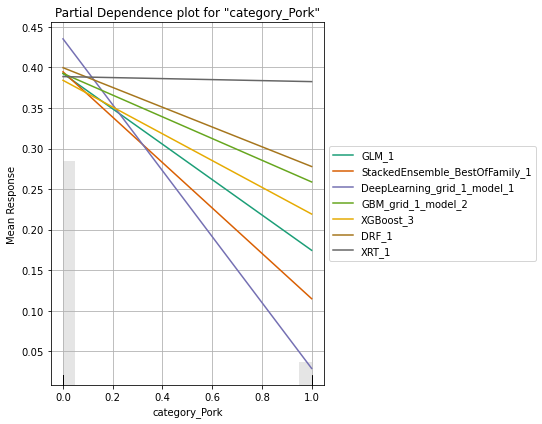

In [ ]:
explain_model = aml.explain(frame = test, figsize = (8,6))

In [ ]:
pip install auto-sklearn


     |████████████████████████████████| 6.5 MB 6.1 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 7.3 MB 8.3 MB/s eta 0:00:01
     |████████████████████████████████| 293 kB 6.3 MB/s eta 0:00:01
     |████████████████████████████████| 260 kB 9.3 MB/s eta 0:00:01
     |████████████████████████████████| 882 kB 9.8 MB/s eta 0:00:01
     |████████████████████████████████| 46 kB 14.7 MB/s eta 0:00:01
  Created wheel for auto-sklearn: filename=auto_sklearn-0.15.0-py3-none-any.whl size=6641936 sha256=499e33129b23fffe1ed9c19e89c52a086cf96831b6f9c063e2df1285ee3392a4
  Stored in directory: /Users/stephaniegessler/Library/Caches/pip/wheels/7a/47/fd/4ef4e0ab13b80ba38029f84a188f67e6205a63e3416f5b8bf7
  Created wheel for pynisher: filename=pynisher-0.6.4-py3-none-any.whl size=7043 sha256=149ccda0f42c61253ca8037de2cc9ee1256371909d4267952d26f54ebda4b001
  Stored in dir

In [ ]:
import autosklearn.classification


ImportError: cannot import name 'if_delegate_has_method' from 'sklearn.utils.metaestimators' (/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py)

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame containing the data
X = df.drop('high_traffic', axis=1)
y = df['high_traffic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=600,
    per_run_time_limit=150,
    ensemble_size=1,
    memory_limit=None,  # Disabling memory limit
    metric=autosklearn.metrics.f1
)

automl.fit(X_train, y_train)

In [ ]:
print(automl.show_models())


In [ ]:
# Extract the results into a DataFrame
import pandas as pd
results_df = pd.DataFrame(automl.cv_results_)

# Display models and their F1 scores
for index, row in results_df.iterrows():
    model_name = row['params']['classifier:__choice__']
    f1_score = row['mean_test_score']
    print(f"Model: {model_name}, F1 Score: {f1_score:.4f}")


In [ ]:
unique_models = results_df['params'].apply(lambda x: x['classifier:__choice__']).unique()
print("Unique models evaluated:")
for model in unique_models:
    print(model)


In [ ]:
pip install pipelineprofiler

In [ ]:
import PipelineProfiler
# automl is an object Which has already been created.
profiler_data= PipelineProfiler.import_autosklearn(automl)
PipelineProfiler.plot_pipeline_matrix(profiler_data)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    "multi_class": ["auto", "ovr", "multinomial"]
}

# Initialize the Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=5000)

# Set up the grid search
grid_search = GridSearchCV(logreg, param_grid, cv=10, scoring='f1')

# Fit the model using the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and the associated accuracy
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron, SGDClassifier

# Define the list of models
model_list = [
    LogisticRegression(), 
    KNeighborsClassifier(),
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LinearSVC(),
    Perceptron(), 
    SGDClassifier(),
    ExtraTreesClassifier()

]

# Define a pipeline with a scaler and a placeholder for the classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # You can change this to MinMaxScaler() if needed
    ('classifier', LogisticRegression())  # Placeholder
])

# List to store F1 scores for each model
f1_scores = {}

# Iterate over each model, train it, and collect its F1 score
for model in model_list:
    # Set the classifier in the pipeline
    pipeline.set_params(classifier=model)
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)
    
    # Compute and store the F1 score
    f1_scores[type(model).__name__] = f1_score(y_test, y_pred)

f1_scores


In [ ]:
# scatterplot of calories vs. sugar
sns.regplot(x='calories', y='sugar', data=df, scatter=True)

In [ ]:
#scatterplot of calories vs. carbohydrates
sns.regplot(x='calories', y='carbohydrate', data=df, scatter=True)

In [ ]:
#scatterplot of calories vs. carbohydrates and color by high traffic
sns.lmplot(x='calories', y='carbohydrate', data=df, fit_reg=False, hue='high_traffic', legend=False)

In [ ]:
# plot bar chart  of calories, color change in bar with variable high_traffic
sns.barplot(x='calories', y='high_traffic', data=df)


In [ ]:
# Plotting the distribution of recipes across different categories
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='category', order=df['category'].value_counts().index, palette="viridis")
plt.title("Distribution of Recipes Across Categories")
plt.xlabel("Category")
plt.ylabel("Number of Recipes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
